# PROYECTO INTEGRADOR M4: Expansión Estratégica de Biogenesys con Python

## Avance 1:

Consignas:

Empezamos llamando a las librerías que vamos a utilizar, en este caso numpy y pandas.

In [2]:
import numpy as np
import pandas as pd

### 3. Lee el archivo data_latinoamerica.csv con código Python en tu Visual Studio Code. ¡ATENCIÓN! Este proceso puede demorar algunos minutos

En este paso abrimos el dataset y vemos las primeras observaciones para verificar que este correcto.

In [3]:
# Abrimos el dataset
data_lat = pd.read_csv('data_latinoamerica.csv')

In [4]:
# Vemos las primeras observaciones
data_lat.head()

location_key        date country_code country_name  new_confirmed  \
0           AR  2020-01-01           AR    Argentina            3.0   
1           AR  2020-01-02           AR    Argentina           14.0   
2           AR  2020-01-03           AR    Argentina            3.0   
3           AR  2020-01-04           AR    Argentina            7.0   
4           AR  2020-01-05           AR    Argentina            5.0   

   new_deceased  cumulative_confirmed  cumulative_deceased  \
0           0.0                   3.0                  0.0   
1           0.0                  17.0                  0.0   
2           0.0                  20.0                  0.0   
3           0.0                  27.0                  0.0   
4           0.0                  32.0                  0.0   

   cumulative_vaccine_doses_administered  population  ...  \
0                                    NaN  44938712.0  ...   
1                                    NaN  44938712.0  ...   
2                                    NaN  44938712.0  ...   
3                                    NaN  44938712.0  ...   
4                                    NaN  44938712.0  ...   

   population_largest_city  area_rural_sq_km  area_urban_sq_km  \
0               15057273.0         2690269.0           55032.0   
1               15057273.0         2690269.0           55032.0   
2               15057273.0         2690269.0           55032.0   
3               15057273.0         2690269.0           55032.0   
4               15057273.0         2690269.0           55032.0   

   life_expectancy  adult_male_mortality_rate  adult_female_mortality_rate  \
0            76.52                    147.086                       79.483   
1            76.52                    147.086                       79.483   
2            76.52                    147.086                       79.483   
3            76.52                    147.086                       79.483   
4            76.52                    147.086                       79.483   

   pollution_mortality_rate  comorbidity_mortality_rate  new_recovered  \
0                      26.6                        15.8            NaN   
1                      26.6                        15.8            NaN   
2                      26.6                        15.8            NaN   
3                      26.6                        15.8            NaN   
4                      26.6                        15.8            NaN   

   cumulative_recovered  
0                   NaN  
1                   NaN  
2                   NaN  
3                   NaN  
4                   NaN  

[5 rows x 50 columns]

In [8]:
data_lat.dtypes


location_key                              object
date                                      object
country_code                              object
country_name                              object
new_confirmed                            float64
new_deceased                             float64
cumulative_confirmed                     float64
cumulative_deceased                      float64
cumulative_vaccine_doses_administered    float64
population                               float64
population_male                          float64
population_female                        float64
population_rural                         float64
population_urban                         float64
population_density                       float64
human_development_index                  float64
population_age_00_09                     float64
population_age_10_19                     float64
population_age_20_29                     float64
population_age_30_39                     float64
population_age_40_49

### 4. Comprueba que el dataset cargado tiene la cantidad de registros y columnas especificadas (Recuerda que hay una función para ello).

Para ver la cantidad de registros y columnas especicificadas, utilizamos la función shape y vemos que tenemos la misma cantidad de filas y columnas que dice el enunciado.

In [9]:
np.shape(data_lat)


(12216057, 50)

### 5. Selecciona los países donde se expandirán: Colombia, Argentina, Chile, México, Perú y Brasil.

Para ver como están escritos los valores de esos nombres, primero hacemos un conteo de las obsevaciones que tiene la variable 'country_name'. 

In [40]:
data_lat['country_name'].value_counts()

country_name
Brazil                5565456
Mexico                2475518
Peru                  1883891
Colombia              1145596
Argentina              540095
Chile                  359733
Dominican Republic      32703
Ecuador                 24775
Venezuela               24775
Guatemala               22793
Uruguay                 19820
Paraguay                18829
Honduras                18829
Cuba                    17838
Nicaragua               17838
El Salvador             14865
Panama                  13874
Bolivia                  9910
Costa Rica               7928
Puerto Rico               991
Name: count, dtype: int64

Una vez que sabemos como se escriben, creamos la lista de los paises que nos interesan filtrar y hacemos el filtro.

In [41]:
paises = ['Argentina', 'Brazil', 'Chile', 'Colombia', 'Mexico', 'Peru']

data_paises = data_lat[data_lat['country_name'].isin(paises)]

Verificamos la cantidad de datos que nos quedan con el filtro aplicado.

In [42]:
np.shape(data_paises)

(11970289, 50)

Vemos que perdemos pocos casos al aplicar el filtro. Pasa de 12.2 millones a 11.9 millones únicamente.

Para ver la calidad de los datos, hacemos una suma de la cantidad de datos faltantes (nulos) que hay en cada una de las columnas.

In [43]:
data_paises.isnull().sum()

location_key                                    0
date                                            0
country_code                                    0
country_name                                    0
new_confirmed                             5620283
new_deceased                              5661788
cumulative_confirmed                      5619937
cumulative_deceased                       5661426
cumulative_vaccine_doses_administered    11706131
population                                 521266
population_male                           1122803
population_female                         1122803
population_rural                         11964343
population_urban                         11964343
population_density                       11964343
human_development_index                   6472221
population_age_00_09                      1465689
population_age_10_19                      1465689
population_age_20_29                      1465689
population_age_30_39                      1465689


Es necesario realizar un nuevo filtro, y para ello utilizaremos la variable 'location_key'. Pero antes de utilizarla, vamos a hacer una prueba de los 'location_key' de Argentina. 

In [44]:
data_arg_cruda = data_lat[data_lat['country_code'] == 'AR']

data_arg_cruda['location_key'].value_counts()

location_key
AR          991
AR_N_112    991
AR_N_070    991
AR_N_077    991
AR_N_084    991
           ... 
AR_D_021    991
AR_D_014    991
AR_D_007    991
AR_D        991
AR_Z_049    991
Name: count, Length: 545, dtype: int64

Al analizar la variable 'location_key' de los datos de Argentina y ayudandonos del diccionario de variables, vemos que el código se compone de 3 partes: los primeros dos dígitos (AR) hacen referencia al país, la letra hace refencia a la provincia y los últimos tres dígitos hacen referencia al departamento (o partido). Por lo tanto, si yo quisiera analizar los casos de la ciduad donde vivo (Olavarría, Prov. de Buenos Aires), tendría que filtrar por el código AR_B_112. Si utilizamos únicamente los valores AR_B, es el agregado de los casos a nivel provincial y los valores AR, hacen referencia a los valores agregados a nivel nacional.

In [45]:
data_olavarria = data_lat[data_lat['location_key'] == 'AR_B_112']

data_olavarria.head()

location_key        date country_code country_name  new_confirmed  \
37658     AR_B_112  2020-01-01           AR    Argentina            NaN   
37659     AR_B_112  2020-01-02           AR    Argentina            NaN   
37660     AR_B_112  2020-01-03           AR    Argentina            NaN   
37661     AR_B_112  2020-01-04           AR    Argentina            NaN   
37662     AR_B_112  2020-01-05           AR    Argentina            NaN   

       new_deceased  cumulative_confirmed  cumulative_deceased  \
37658           NaN                   NaN                  NaN   
37659           NaN                   NaN                  NaN   
37660           NaN                   NaN                  NaN   
37661           NaN                   NaN                  NaN   
37662           NaN                   NaN                  NaN   

       cumulative_vaccine_doses_administered  population  ...  \
37658                                    NaN     41336.0  ...   
37659                                    NaN     41336.0  ...   
37660                                    NaN     41336.0  ...   
37661                                    NaN     41336.0  ...   
37662                                    NaN     41336.0  ...   

       population_largest_city  area_rural_sq_km  area_urban_sq_km  \
37658                      NaN               NaN               NaN   
37659                      NaN               NaN               NaN   
37660                      NaN               NaN               NaN   
37661                      NaN               NaN               NaN   
37662                      NaN               NaN               NaN   

       life_expectancy  adult_male_mortality_rate  \
37658              NaN                        NaN   
37659              NaN                        NaN   
37660              NaN                        NaN   
37661              NaN                        NaN   
37662              NaN                        NaN   

       adult_female_mortality_rate  pollution_mortality_rate  \
37658                          NaN                       NaN   
37659                          NaN                       NaN   
37660                          NaN                       NaN   
37661                          NaN                       NaN   
37662                          NaN                       NaN   

       comorbidity_mortality_rate  new_recovered  cumulative_recovered  
37658                         NaN            NaN                   NaN  
37659                         NaN            NaN                   NaN  
37660                         NaN            NaN                   NaN  
37661                         NaN            NaN                   NaN  
37662                         NaN            NaN                   NaN  

[5 rows x 50 columns]

Por lo tanto, vamos a filtrar los valores por los 'location_key' que hagan referencia a los países en valores agregados. Luego controlamos la cantidad de observaciones que nos quedan en nuestro dataset.

In [46]:
data_paises = data_lat[data_lat['location_key']
                       .isin(['AR', 'BR', 'CL', 'CO', 'MX', 'PE'])]

np.shape(data_paises)

(5946, 50)

### 6. Filtra los datos en fechas mayores a 2021-01-01.

Filtramos por la fecha y chequeamos que cantidad de filas y columnas tenemos.

In [47]:
data = data_paises[data_paises['date'] > '2021-01-01'] 
np.shape(data)


(3744, 50)

### 7. Compara a nivel de país para llenar valores faltantes.

### 8. Realiza una limpieza preliminar de los datos, eliminando registros nulos y corrigiendo los tipos de datos donde sea necesario, trata con valores medios, valores anteriores o valores siguientes.

Dado que los puntos 7 y 8 están relacionados, vamos a resolverlos juntos.

In [48]:
# Volvemos a revisar la calidad de nuestros datos contando todos los valores nulos
#total_nulos_fecha_pais = data_latinoamerica_fecha_pais.isnull().sum()[data.isnull().sum()>0]
total_nulos_fecha_pais = data.isnull().sum()[data.isnull().sum()>0]


#Imprimimos para ver nuestros nulos y para ver cuánto nos queda de nuestra última data filtrada
print(total_nulos_fecha_pais)
print(np.shape(data))

new_confirmed                              21
new_deceased                               21
cumulative_confirmed                       21
cumulative_deceased                        21
cumulative_vaccine_doses_administered     584
average_temperature_celsius                42
minimum_temperature_celsius                41
maximum_temperature_celsius                41
rainfall_mm                                90
relative_humidity                          42
new_recovered                            2116
cumulative_recovered                     2736
dtype: int64
(3744, 50)


Antes que hacer la imputación de los datos faltantes, vamos a hacer una inspección visual de los datos, para ver si hay algo que a simple vista nos llame la atención. Para ello, vamos a tomar como modelo el país Argentina (esto también se hizo manualmente para cada uno de los países).

In [49]:
data_argentina = data[data["country_name"] == 'Argentina']
print(data_argentina)

    location_key        date country_code country_name  new_confirmed  \
367           AR  2021-01-02           AR    Argentina         7767.0   
368           AR  2021-01-03           AR    Argentina         4934.0   
369           AR  2021-01-04           AR    Argentina        13953.0   
370           AR  2021-01-05           AR    Argentina        14085.0   
371           AR  2021-01-06           AR    Argentina        14496.0   
..           ...         ...          ...          ...            ...   
986           AR  2022-09-13           AR    Argentina            0.0   
987           AR  2022-09-14           AR    Argentina            NaN   
988           AR  2022-09-15           AR    Argentina            NaN   
989           AR  2022-09-16           AR    Argentina            NaN   
990           AR  2022-09-17           AR    Argentina            NaN   

     new_deceased  cumulative_confirmed  cumulative_deceased  \
367         166.0             1670634.0              46688.

Al analizar el dataset vemos 3 cosas interesantes:

- 1) Lo que se puede ver a simple vista, es que hay hay una relación directa entre las columnas _"new_"_ y las columnas _"cumulative_"_. Por ejemplo la columna cumulative_confirmed suma todos los valores diarios de la variable _"new_confirmed"_. 
- 2) Vemos que para los días posteriores al 13 de septiembre de 2022, aparecen muchos valores faltantes en columnas claves (las columnas _"new_"_ y las columnas _"cumulative_"_). Por lo tanto, para evitar romper la lógica al hacer una asignación de los valores nulos y considerando que las variables son las últimas del dataset, consideramos que es más "sano" eliminarlas a tener que inputar los datos faltantes.
- 3) Hay una gran cantidad de variables que tienen los mismos valores, por lo que carece de sentido hacer un gran análisis estadístico de dichas variables.

In [50]:
data = data[data['date'] < '2022-09-14'] 
np.shape(data)

(3720, 50)

Ahora, volvemos a analizar la calidad de los datos una vez realizada el último filtro.

In [51]:
# Volvemos a revisar la calidad de nuestros datos contando todos los valores nulos
#total_nulos_fecha_pais = data.isnull().sum()[data.isnull().sum()>0]
total_nulos_fecha_pais = data.isnull().sum()[data.isnull().sum()>0]


#Imprimimos para ver nuestros nulos y para ver cuánto nos queda de nuestra última data filtrada
print(total_nulos_fecha_pais)
print(np.shape(data))

cumulative_vaccine_doses_administered     562
average_temperature_celsius                18
minimum_temperature_celsius                17
maximum_temperature_celsius                17
rainfall_mm                                66
relative_humidity                          18
new_recovered                            2094
cumulative_recovered                     2714
dtype: int64
(3720, 50)


Con el último filtro vemos que bajó la cantidad de datos faltantes en variables claves como new_confirmed, new_deceased, 
cumulative_confirmed y cumulative_deceased. 
Para las restantes variables faltantes, vamos a hacer una imputación de los datos faltantes por el promedio en las siguientes variables: average_temperature_celsius, minimum_temperature_celsius, maximum_temperature_celsius, rainfall_mm y relative_humidity

In [52]:
for pais in paises:
    data["average_temperature_celsius"]=data["average_temperature_celsius"].fillna(data[data["country_name"]== pais]["average_temperature_celsius"].mean())
    data["minimum_temperature_celsius"]=data["minimum_temperature_celsius"].fillna(data[data["country_name"]== pais]["minimum_temperature_celsius"].mean())
    data["maximum_temperature_celsius"]=data["maximum_temperature_celsius"].fillna(data[data["country_name"]== pais]["maximum_temperature_celsius"].mean())
    data["rainfall_mm"]=data["rainfall_mm"].fillna(data[data["country_name"]== pais]["rainfall_mm"].mean())
    data["relative_humidity"]=data["relative_humidity"].fillna(data[data["country_name"]== pais]["relative_humidity"].mean())

Para las siguientes variables, transformaremos en CERO a los valores faltantes.

In [53]:
data["cumulative_vaccine_doses_administered"] = data["cumulative_vaccine_doses_administered"].fillna(0)
data["new_recovered"] = data["new_recovered"].fillna(0)
data["cumulative_recovered"]= data["cumulative_recovered"].fillna(0)


### 9. Examina las características básicas del dataset para comprender la distribución de las variables clave como incidencia de COVID-19 e identifica las variables que consideras que son claves para tu análisis.


In [54]:
data.info

<bound method DataFrame.info of          location_key        date country_code country_name  new_confirmed  \
367                AR  2021-01-02           AR    Argentina         7767.0   
368                AR  2021-01-03           AR    Argentina         4934.0   
369                AR  2021-01-04           AR    Argentina        13953.0   
370                AR  2021-01-05           AR    Argentina        14085.0   
371                AR  2021-01-06           AR    Argentina        14496.0   
...               ...         ...          ...          ...            ...   
10253868           PE  2022-09-09           PE         Peru         2399.0   
10253869           PE  2022-09-10           PE         Peru         1773.0   
10253870           PE  2022-09-11           PE         Peru          813.0   
10253871           PE  2022-09-12           PE         Peru          441.0   
10253872           PE  2022-09-13           PE         Peru         1150.0   

          new_deceased  cumulat

Para ver las estadísticas descriptivas del dataset, vamos a utilizar la función describe()

In [17]:
data.describe()

new_confirmed  new_deceased  cumulative_confirmed  cumulative_deceased  \
count    3720.000000   3720.000000          3.720000e+03          3720.000000   
mean    13940.774731    277.333602          6.770470e+06        192917.725269   
std     24282.335110    508.617385          7.976624e+06        182719.067693   
min      -573.000000      0.000000          9.710000e+02             1.000000   
25%      1530.750000     25.750000          2.129251e+06         59229.500000   
50%      5175.000000     99.000000          3.632144e+06        139628.500000   
75%     14928.750000    314.000000          6.223497e+06        215043.000000   
max    298408.000000  11447.000000          3.454438e+07        685002.000000   

       cumulative_vaccine_doses_administered    population  population_male  \
count                           3.720000e+03  3.720000e+03     3.720000e+03   
mean                            6.567993e+07  7.772147e+07     3.787035e+07   
std                             9.240595e+07  6.713782e+07     3.318496e+07   
min                             0.000000e+00  1.757400e+07     8.972014e+06   
25%                             2.846482e+06  2.938188e+07     1.445076e+07   
50%                             3.263410e+07  4.791080e+07     2.225416e+07   
75%                             7.499545e+07  1.109920e+08     5.485523e+07   
max                             3.478113e+08  2.125594e+08     1.044358e+08   

       population_female  population_rural  population_urban  ...  \
count       3.720000e+03      3.720000e+03      3.720000e+03  ...   
mean        3.927162e+07      1.255498e+07      6.833931e+07  ...   
std         3.448410e+07      1.008075e+07      5.829534e+07  ...   
min         8.601989e+06      2.341903e+06      1.661014e+07  ...   
25%         1.493113e+07      3.599141e+06      2.539034e+07  ...   
50%         2.324582e+07      8.316128e+06      4.108344e+07  ...   
75%         5.748131e+07      2.494867e+07      1.026269e+08  ...   
max         1.081236e+08      2.780789e+07      1.832416e+08  ...   

       population_largest_city  area_rural_sq_km  area_urban_sq_km  \
count             3.720000e+03      3.720000e+03       3720.000000   
mean              1.443888e+07      2.636580e+06      59502.500000   
std               5.710082e+06      2.584742e+06      45125.359096   
min               6.723516e+06      7.094180e+05      12027.000000   
25%               1.055471e+07      1.090598e+06      16425.000000   
50%               1.291832e+07      1.543881e+06      45582.000000   
75%               2.167191e+07      2.690269e+06     102418.000000   
max               2.184651e+07      8.241430e+06     134981.000000   

       life_expectancy  adult_male_mortality_rate  \
count      3720.000000                3720.000000   
mean         76.808500                 154.274667   
std           1.597395                  27.000169   
min          74.992000                 107.669000   
25%          75.672000                 146.370000   
50%          76.518000                 149.351000   
75%          77.109000                 184.379000   
max          80.042000                 188.528000   

       adult_female_mortality_rate  pollution_mortality_rate  \
count                  3720.000000               3720.000000   
mean                     81.428000                 36.566667   
std                      11.800634                 13.027580   
min                      59.035000                 25.300000   
25%                      77.999000                 26.600000   
50%                      82.149000                 33.300000   
75%                      91.421000                 37.000000   
max                      95.815000                 63.900000   

       comorbidity_mortality_rate  new_recovered  cumulative_recovered  
count                 3720.000000    3720.000000          3.720000e+03  
mean                    14.816667    8308.563710          3.901404e+06  
std                      1.665974   23

### 10. Guarda los datos filtrados en un archivo con el nombre DatosFinalesFiltrado.csv a fin de poder utilizarlo luego y no tener que repetir el proceso de filtrado y limpieza.


In [68]:
data.to_csv('DatosFinalesFiltrado.csv', 
            index = False)


### 11) Aplica bucles for y/o while para el cálculo de estadísticas descriptivas y otras métricas importantes que ofrece pandas por default. Luego responde:

- ¿Qué implican estas métricas y cómo pueden ayudar en el análisis de datos?
- ¿Se muestran todas las estadísticas en todas las columnas durante el análisis?
- ¿Cuál es la razón de la respuesta anterior y cómo podría afectar la interpretación de los resultados obtenidos?


In [58]:
# "Describe" me da estadísticas principales.
# El ciclo for nos ayuda a obtener la información para todas las columnas que tengan valores 
for i in data.columns:
    print(i) # imprime el índice
    print(data[i].describe()) # imprime la información estadística por columna
    print("--------------------------------------------") # para separar los datos de cada columna

location_key
count     3720
unique       6
top         AR
freq       620
Name: location_key, dtype: object
--------------------------------------------
date
count           3720
unique           620
top       2021-01-02
freq               6
Name: date, dtype: object
--------------------------------------------
country_code
count     3720
unique       6
top         AR
freq       620
Name: country_code, dtype: object
--------------------------------------------
country_name
count          3720
unique            6
top       Argentina
freq            620
Name: country_name, dtype: object
--------------------------------------------
new_confirmed
count      3720.000000
mean      13940.774731
std       24282.335110
min        -573.000000
25%        1530.750000
50%        5175.000000
75%       14928.750000
max      298408.000000
Name: new_confirmed, dtype: float64
--------------------------------------------
new_deceased
count     3720.000000
mean       277.333602
std        508.617385
min   

### 12) Crea una función que permita obtener la mediana, varianza y el rango. Te dejamos algunas preguntas para analizar esas medidas:

- ¿Qué representa la mediana?
- ¿Cómo varía la dispersión de los datos en el conjunto de datos analizado, en términos de la varianza y el rango? 
- ¿Qué nos puede indicar esto sobre la consistencia o la variabilidad de los datos en relación con la mediana?

In [59]:
def estadisticas_basicas(d):
    for i in data.columns:
        if d[i].dtype == 'float64' or d[i].dtype == 'int64':
            print(i)
            print("Media: ",    d[i].mean())
            print("Mediana: ",  d[i].median())
            print("Moda: ",     d[i].mode())
            print("Varianza:",  d[i].var())
            print("Rango:",     d[i].max() - d[i].min())
            print("---------------------------------------------")



estadisticas_basicas(data)

new_confirmed
Media:  13940.774731182795
Mediana:  5175.0
Moda:  0    0.0
Name: new_confirmed, dtype: float64
Varianza: 589631798.4079658
Rango: 298981.0
---------------------------------------------
new_deceased
Media:  277.3336021505376
Mediana:  99.0
Moda:  0    0.0
Name: new_deceased, dtype: float64
Varianza: 258691.64425913722
Rango: 11447.0
---------------------------------------------
cumulative_confirmed
Media:  6770469.991129032
Mediana:  3632143.5
Moda:  0     6093645.0
1     6095316.0
2     6099111.0
3     6103455.0
4     6109105.0
5     6117847.0
6     6131657.0
7     6151354.0
8     6175181.0
9     6198848.0
10    6223497.0
11    6247634.0
12    6265798.0
13    6278998.0
14    6286392.0
15    6293130.0
16    6299595.0
17    6302809.0
18    9313453.0
19    9341492.0
20    9367172.0
21    9394326.0
22    9426171.0
23    9465827.0
24    9507562.0
25    9560307.0
26    9602534.0
27    9633732.0
28    9658391.0
29    9678225.0
30    9689861.0
Name: cumulative_confirmed, dtype: 

Ahora quiero analizar las estadísitcas descriptivas para las variables pero en cada país.

In [60]:
for i in paises:
    print(" ------------------------  ", i, "  ------------------------")
    estadisticas_basicas(data[data['country_name'] == i ])


 ------------------------   Argentina   ------------------------
new_confirmed
Media:  12911.385483870969
Mediana:  5180.0
Moda:  0    0.0
Name: new_confirmed, dtype: float64
Varianza: 556958966.6314529
Rango: 174174.0
---------------------------------------------
new_deceased
Media:  134.3790322580645
Mediana:  62.0
Moda:  0    0.0
Name: new_deceased, dtype: float64
Varianza: 27737.163049142735
Rango: 656.0
---------------------------------------------
cumulative_confirmed
Media:  6079578.7177419355
Mediana:  5319691.0
Moda:  0     9313453.0
1     9341492.0
2     9367172.0
3     9394326.0
4     9426171.0
5     9465827.0
6     9507562.0
7     9560307.0
8     9602534.0
9     9633732.0
10    9658391.0
11    9678225.0
12    9689861.0
Name: cumulative_confirmed, dtype: float64
Varianza: 7469256301336.287
Rango: 8027129.0
---------------------------------------------
cumulative_deceased
Media:  105716.11935483871
Mediana:  116723.0
Moda:  0     128994.0
1     129016.0
2     129070.0
3     1

## Avance 2

Consignas

### 2. Importa las librerías que necesites utilizar en este avance.


In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Importamos los datos y volvemos a definir los países de interes.

In [2]:
data = pd.read_csv("DatosFinalesFiltrado.csv",
                   sep = ',')

paises = ['Argentina', 'Brazil', 'Chile', 'Colombia', 'Mexico', 'Peru']

np.shape(data)

(3720, 50)

Para poder hacer los gráficos utilizando el eje X como fechas, nos conviene cambiar el índice de las observaciones y definir como nuevo índice la columna 'date'.

In [61]:
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

data.head()


location_key country_code country_name  new_confirmed  \
date                                                               
2021-01-02           AR           AR    Argentina         7767.0   
2021-01-03           AR           AR    Argentina         4934.0   
2021-01-04           AR           AR    Argentina        13953.0   
2021-01-05           AR           AR    Argentina        14085.0   
2021-01-06           AR           AR    Argentina        14496.0   

            new_deceased  cumulative_confirmed  cumulative_deceased  \
date                                                                  
2021-01-02         166.0             1670634.0              46688.0   
2021-01-03         157.0             1675568.0              46845.0   
2021-01-04         157.0             1689521.0              47002.0   
2021-01-05         160.0             1703606.0              47162.0   
2021-01-06         131.0             1718102.0              47293.0   

            cumulative_vaccine_doses_administered  population  \
date                                                            
2021-01-02                                20334.0  44938712.0   
2021-01-03                                20529.0  44938712.0   
2021-01-04                                25164.0  44938712.0   
2021-01-05                                29852.0  44938712.0   
2021-01-06                                34162.0  44938712.0   

            population_male  ...  population_largest_city  area_rural_sq_km  \
date                         ...                                              
2021-01-02       19523766.0  ...               15057273.0         2690269.0   
2021-01-03       19523766.0  ...               15057273.0         2690269.0   
2021-01-04       19523766.0  ...               15057273.0         2690269.0   
2021-01-05       19523766.0  ...               15057273.0         2690269.0   
2021-01-06       19523766.0  ...               15057273.0         2690269.0   

            area_urban_sq_km  life_expectancy  adult_male_mortality_rate  \
date                                                                       
2021-01-02           55032.0            76.52                    147.086   
2021-01-03           55032.0            76.52                    147.086   
2021-01-04           55032.0            76.52                    147.086   
2021-01-05           55032.0            76.52                    147.086   
2021-01-06           55032.0            76.52                    147.086   

            adult_female_mortality_rate  pollution_mortality_rate  \
date                                                                
2021-01-02                       79.483                      26.6   
2021-01-03                       79.483                      26.6   
2021-01-04                       79.483                      26.6   
2021-01-05                       79.483                      26.6   
2021-01-06                       79.483                      26.6   

            comorbidity_mortality_rate  new_recovered  cumulative_recovered  
date                                                                         
2021-01-02                        15.8            0.0                   0.0  
2021-01-03                        15.8            0.0                   0.0  
2021-01-04                        15.8            0.0                   0.0  
2021-01-05                        15.8            0.0                   0.0  
2021-01-06                        15.8            0.0                   0.0  

[5 rows x 49 columns]

### 3. Análisis Estadístico con Pandas y Numpy: Explora las propiedades estadísticas del dataset. Calcula medidas de tendencia central, dispersión y correlaciones entre las variables para entender mejor la situación actual y las necesidades de las áreas en estudio.

Primero vamos a replicar lo que hicimos en el punto 11 del Avance 1: algunas estadísticas descriptivas de los datos.


In [24]:
for i in data.columns:
    print(i)
    print(data[i].describe())
    print('---------------------------')

location_key
count     3720
unique       6
top         AR
freq       620
Name: location_key, dtype: object
---------------------------
country_code
count     3720
unique       6
top         AR
freq       620
Name: country_code, dtype: object
---------------------------
country_name
count          3720
unique            6
top       Argentina
freq            620
Name: country_name, dtype: object
---------------------------
new_confirmed
count      3720.000000
mean      13940.774731
std       24282.335110
min        -573.000000
25%        1530.750000
50%        5175.000000
75%       14928.750000
max      298408.000000
Name: new_confirmed, dtype: float64
---------------------------
new_deceased
count     3720.000000
mean       277.333602
std        508.617385
min          0.000000
25%         25.750000
50%         99.000000
75%        314.000000
max      11447.000000
Name: new_deceased, dtype: float64
---------------------------
cumulative_confirmed
count    3.720000e+03
mean     6.770470e

Ahora, haremos una exploración entre las correlaciones de las variables. Por una cuestión de claridad, solo se graficarán las correlaciones positivas o negativas que tengan un coeficiente de correlación absoluta mayor a 0.5.

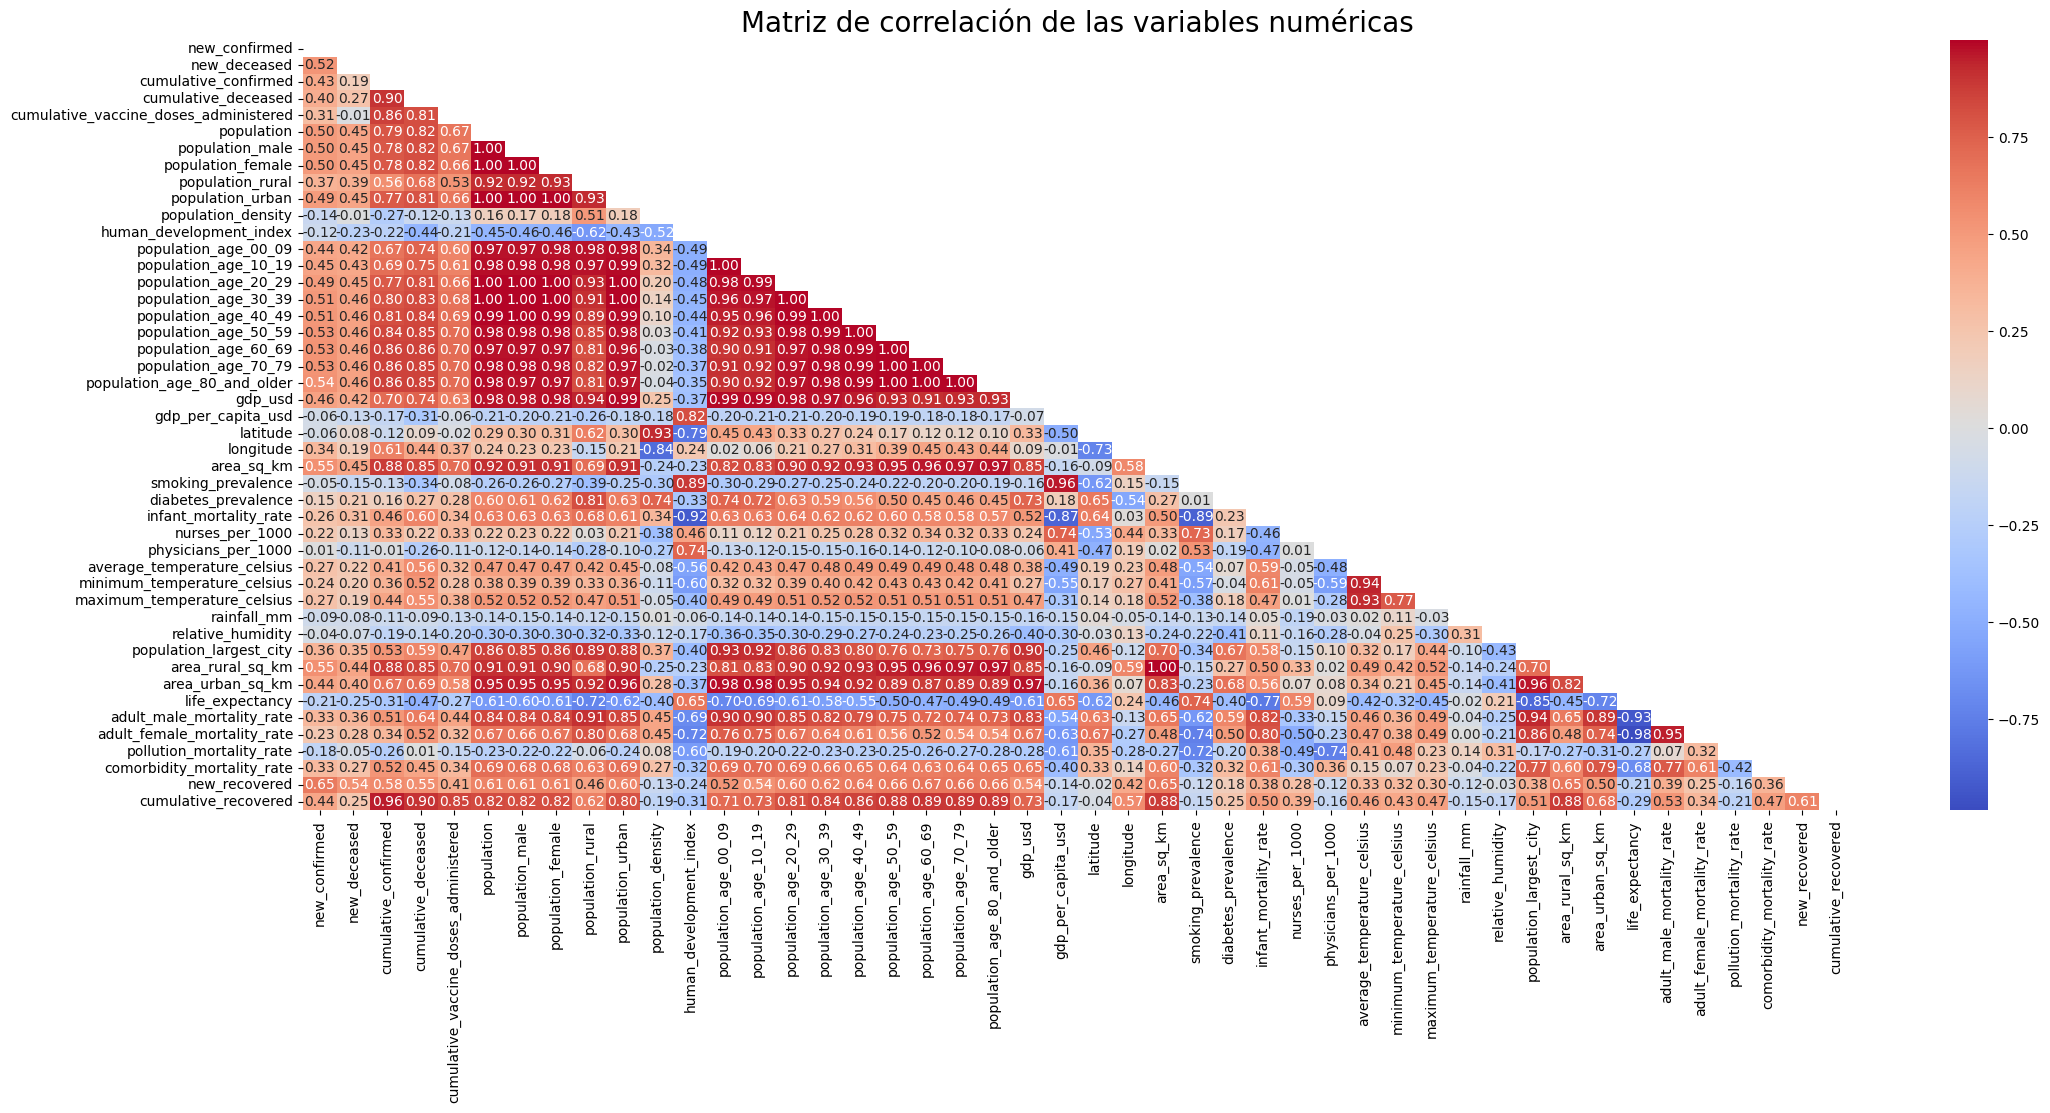

In [65]:
#Se crea la matriz de correlación de las variables numéricas
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

correlation_matrix = data[numeric_columns].corr()

#Aquí se crea máscara para el triángulo superior
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Vamos a mostrar valores superiores a 0.5 es decur donde hay una correlación fuerte sin embargo tambien se puede mostrar valores negativos.
correlation_matrix = correlation_matrix[abs(correlation_matrix) > abs(0.5)]

# Se crea la gráfica
plt.figure(figsize=(25, 10))
heatmap = sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación de las variables numéricas', fontsize=20)
plt.show()

In [ ]:


#Se crea la matriz de correlación de las variables numéricas
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

correlation_matrix = data[numeric_columns].corr()

#Aquí se crea máscara para el triángulo superior
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Vamos a mostrar valores superiores a 0.5 es decur donde hay una correlación fuerte sin embargo tambien se puede mostrar valores negativos.
correlation_matrix = correlation_matrix[abs(correlation_matrix) > abs(0.5)]

# Se crea la gráfica
plt.figure(figsize=(25, 10))
heatmap = sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación de las variables numéricas', fontsize=20)
plt.show()

In [68]:
data.columns

Index(['location_key', 'country_code', 'country_name', 'new_confirmed',
       'new_deceased', 'cumulative_confirmed', 'cumulative_deceased',
       'cumulative_vaccine_doses_administered', 'population',
       'population_male', 'population_female', 'population_rural',
       'population_urban', 'population_density', 'human_development_index',
       'population_age_00_09', 'population_age_10_19', 'population_age_20_29',
       'population_age_30_39', 'population_age_40_49', 'population_age_50_59',
       'population_age_60_69', 'population_age_70_79',
       'population_age_80_and_older', 'gdp_usd', 'gdp_per_capita_usd',
       'latitude', 'longitude', 'area_sq_km', 'smoking_prevalence',
       'diabetes_prevalence', 'infant_mortality_rate', 'nurses_per_1000',
       'physicians_per_1000', 'average_temperature_celsius',
       'minimum_temperature_celsius', 'maximum_temperature_celsius',
       'rainfall_mm', 'relative_humidity', 'population_largest_city',
       'area_rural_sq_km', 

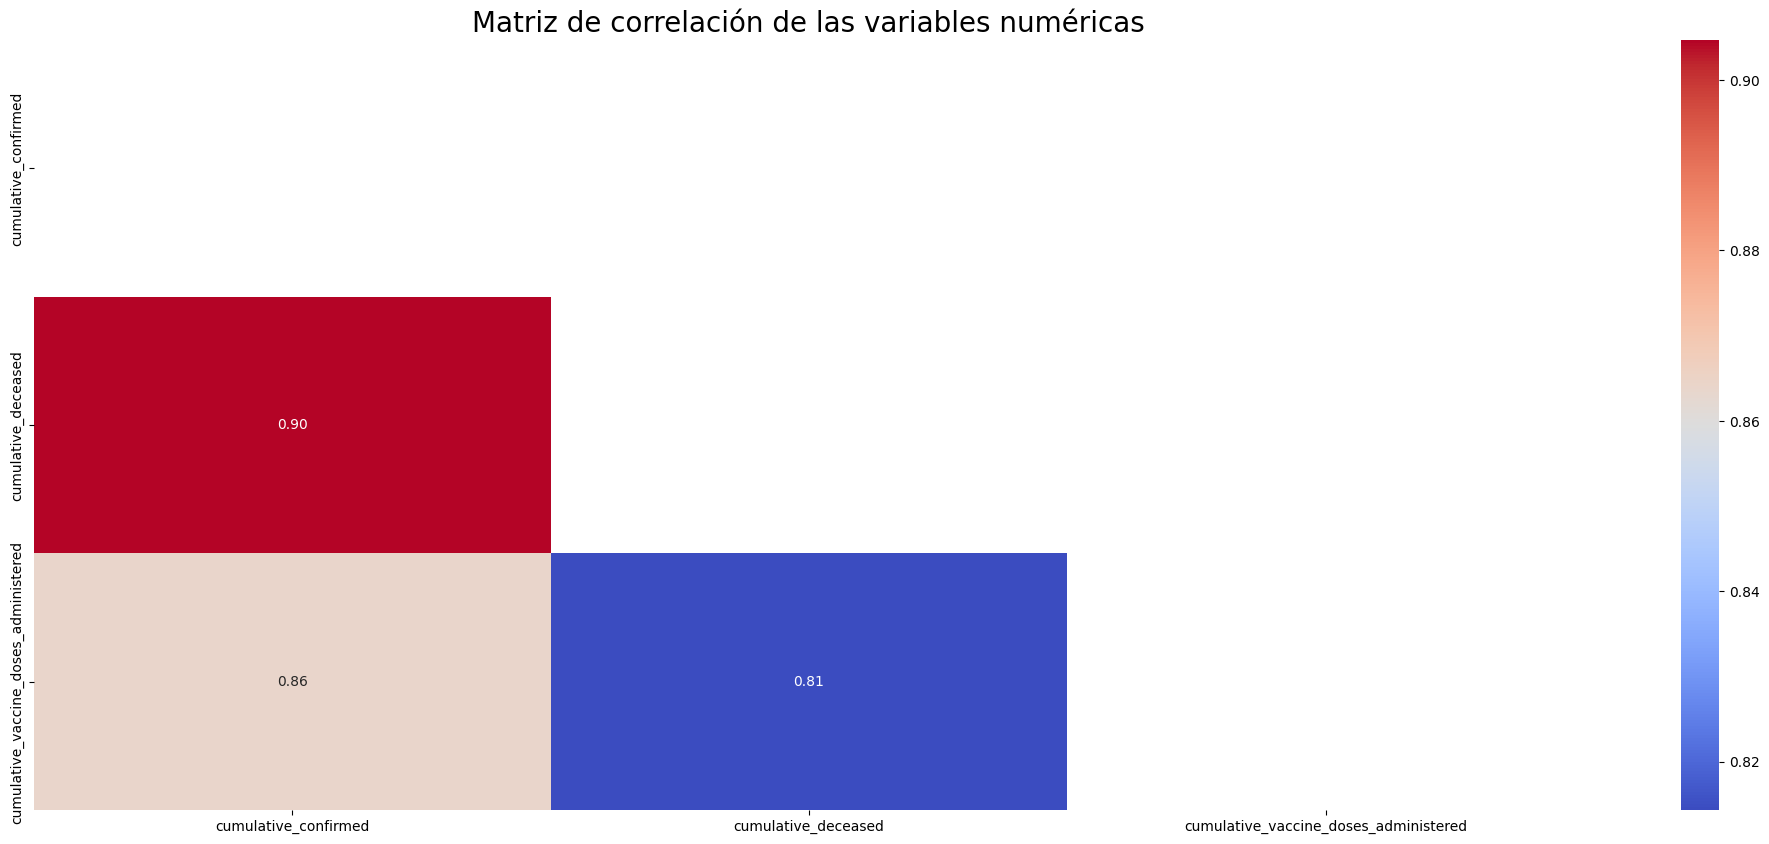

In [77]:
#variables = ['population',
#       'population_male', 'population_female', 'population_rural',
#       'population_urban', 'population_density', 'human_development_index',
#       'population_age_00_09', 'population_age_10_19', 'population_age_20_29',
#       'population_age_30_39', 'population_age_40_49', 'population_age_50_59',
#       'population_age_60_69', 'population_age_70_79',
#       'population_age_80_and_older']

variables = ['cumulative_confirmed', 'cumulative_deceased',
       'cumulative_vaccine_doses_administered']

data_corr = data[variables]

#Se crea la matriz de correlación de las variables numéricas
numeric_columns = data_corr.select_dtypes(include=['float64', 'int64']).columns

correlation_matrix = data_corr[numeric_columns].corr()

#Aquí se crea máscara para el triángulo superior
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Vamos a mostrar valores superiores a 0.5 es decur donde hay una correlación fuerte sin embargo tambien se puede mostrar valores negativos.
correlation_matrix = correlation_matrix[abs(correlation_matrix) > abs(0)]

# Se crea la gráfica
plt.figure(figsize=(25, 10))
heatmap = sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación de las variables numéricas', fontsize=20)
plt.show()


### 4. Visualización de Datos con Matplotlib y Seaborn: Representa los hallazgos por cada país o de manera general a través de gráficos y/o visualizaciones. Debes incluir:

- Histogramas gráficos de densidad y gráficos de densidad para entender la distribución de la incidencia de COVID-19 y las tasas de vacunación.
- Gráficos de barras para comparar diferentes regiones.
- Mapas de calor para identificar correlaciones entre diferentes variables.
- Gráficos de dispersión para explorar posibles relaciones entre las variables.

Las visualizaciones que puedes realizar son:

- Gráficos de barras de países contra el resto de variables.
- Matriz de correlación, trata de crear una submascara para solo tomar una parte del gráfico y filtrar por los valores mayores a 0.5.
- Histogramas de las variables que “Sí” tenga cambios de valores.
- Diagrama de dispersión de la temperatura media contra los casos confirmados.
- Diagrama de dispersión de la temperatura media contra las muertes confirmadas.
- Comportamiento de las dosis administradas de todos los países (Valor medio).
- Evolución de dosis administradas por mes de cada país.
- Muertes por mes de cada país.
- Casos confirmados por mes de cada país.
- Recuperaciones de casos por mes de cada país.
- Comparación del Número de Casos Nuevos entre Países.
- Dosis acumuladas por país
- Boxplot de temperatura media de cada país.
- Violinplot de las variables que “Sí” tenga cambios de valores.
- Distribución de la población por grupos de edad.
- Mapa de calor de Métricas por país.
- Diagrama de barras apilado de comparación de la tasa de mortalidad masculina vs. femenina por país.
- Matriz de correlación de indicadores demográficos y de salud.
- Comparación de la Prevalencia de Diabetes y la Tasa de Mortalidad.


#### 4.1 Gráficos de barras para comparar diferentes regiones.


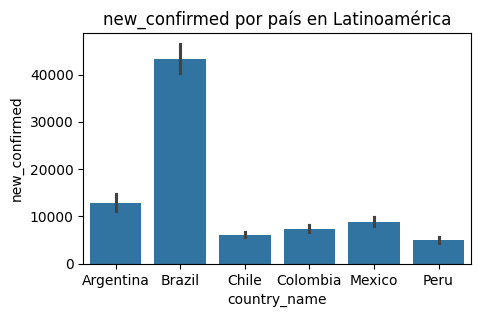

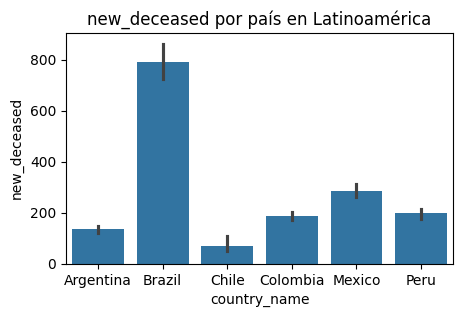

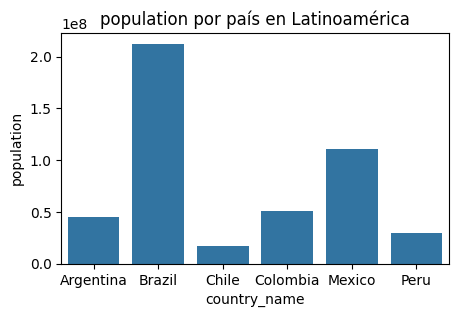

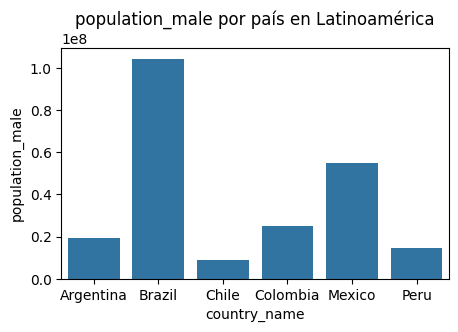

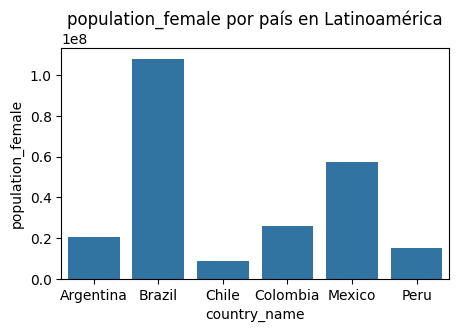

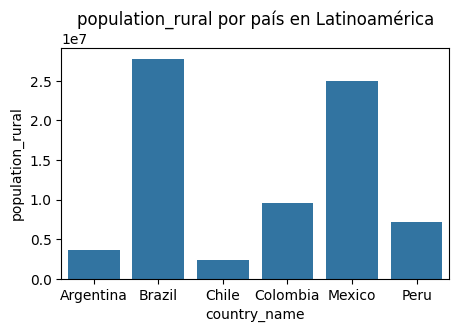

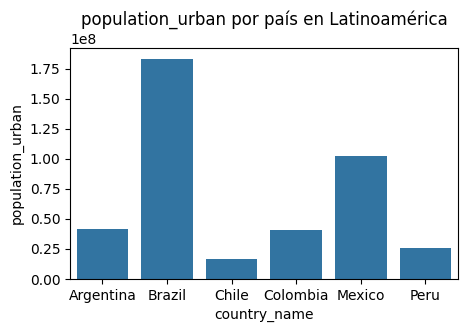

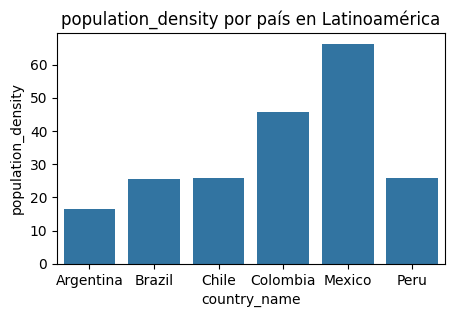

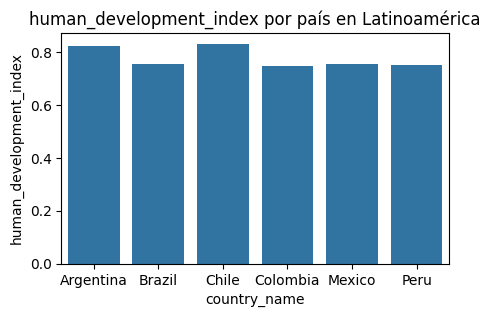

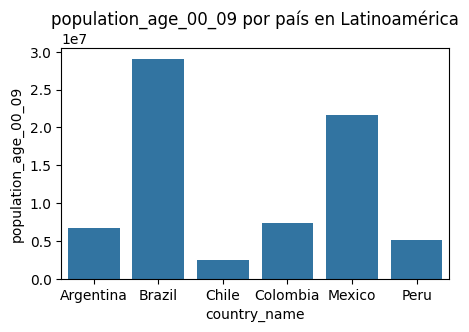

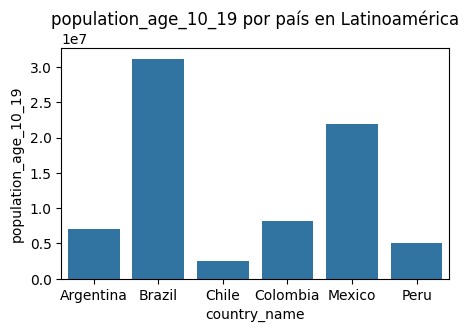

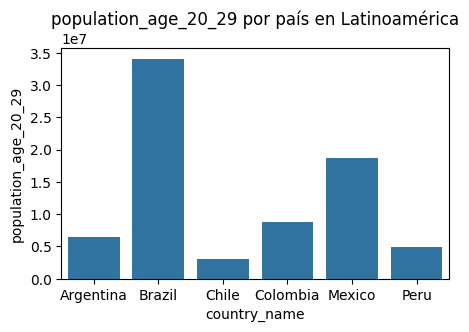

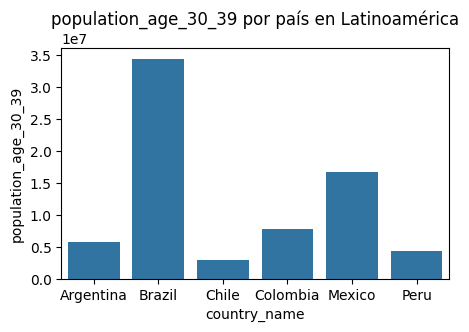

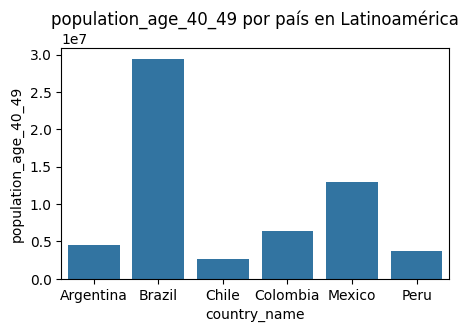

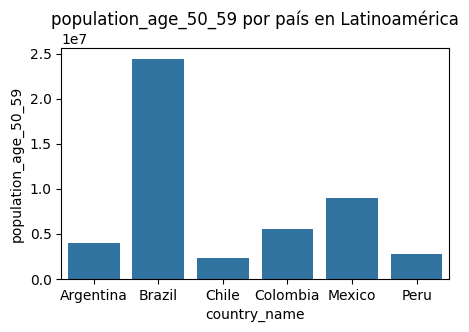

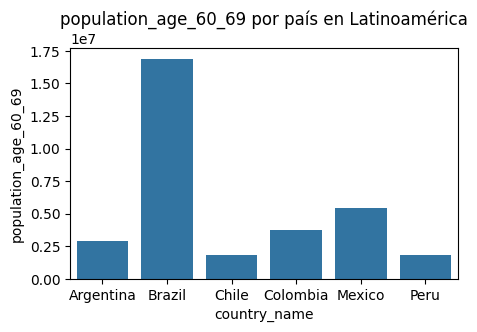

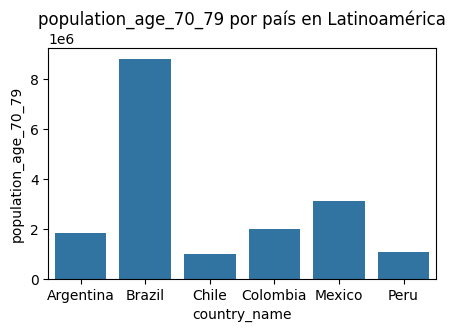

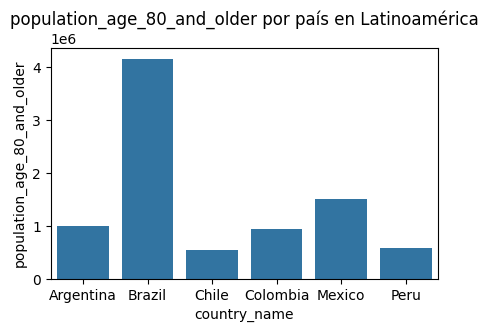

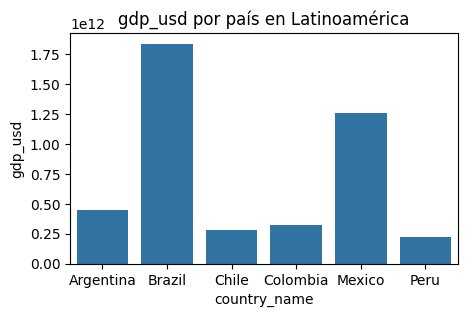

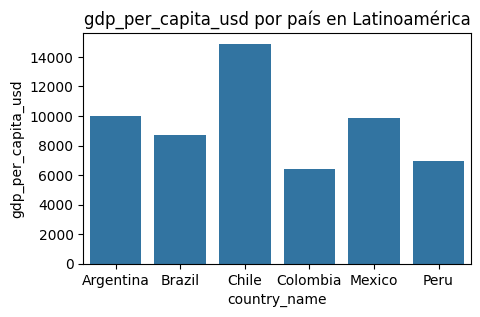

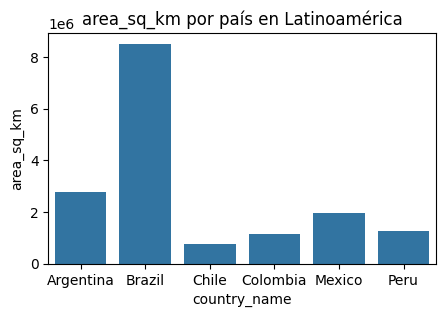

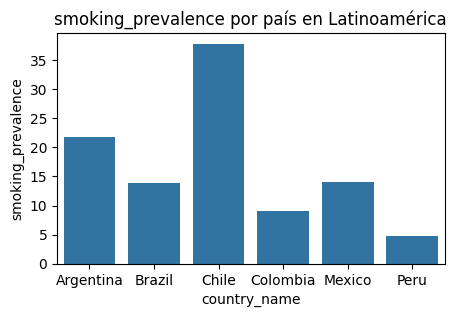

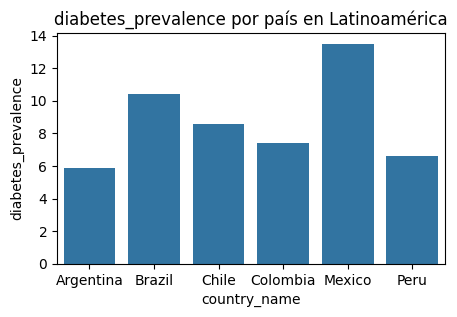

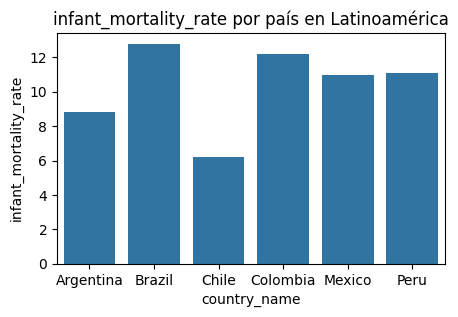

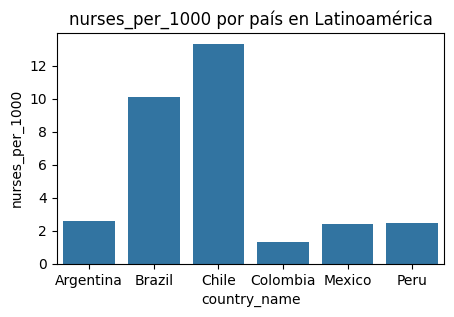

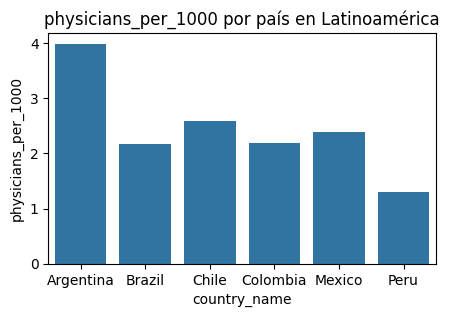

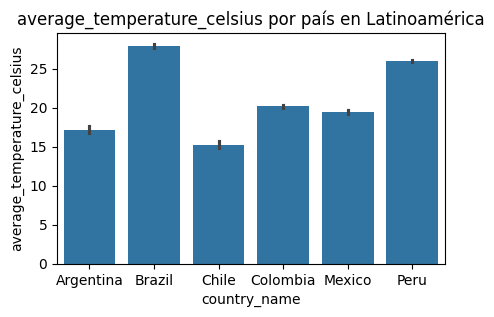

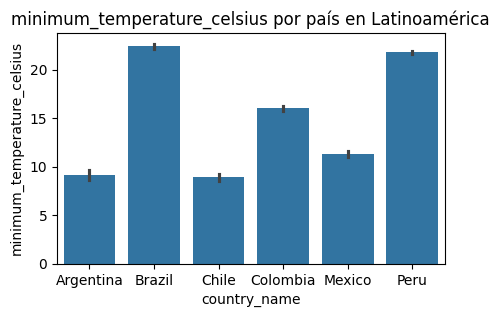

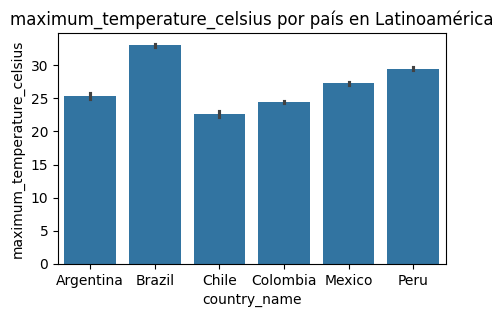

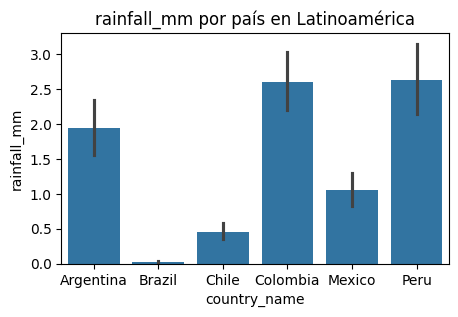

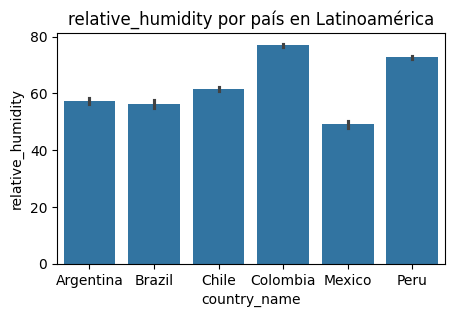

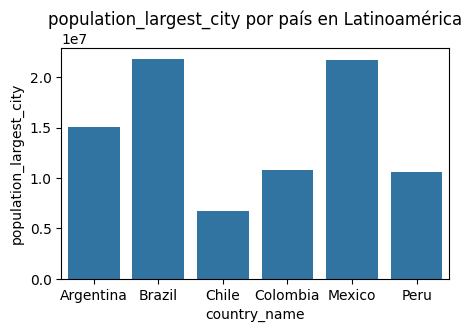

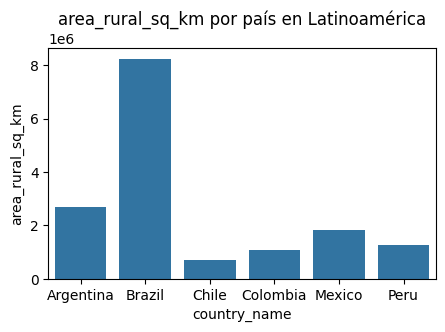

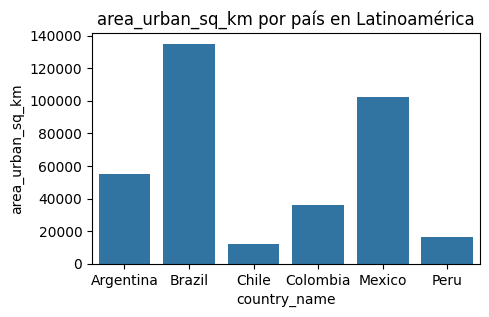

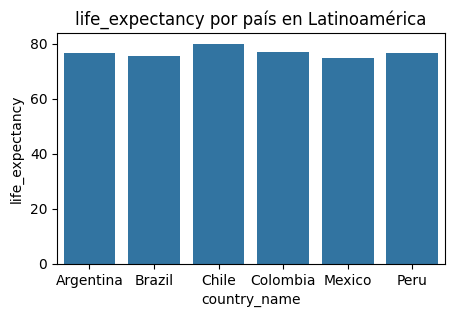

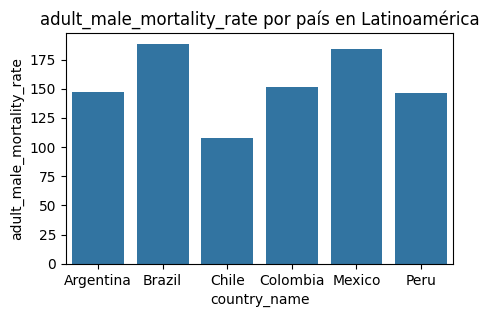

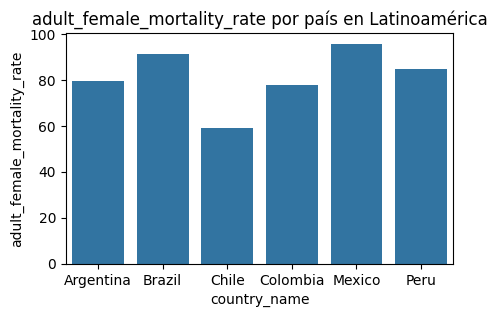

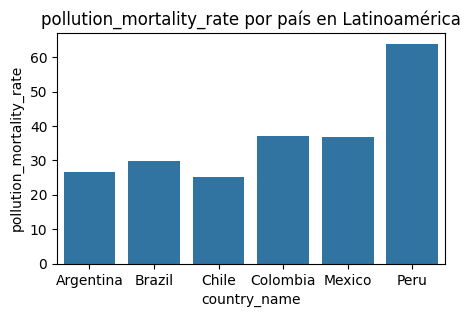

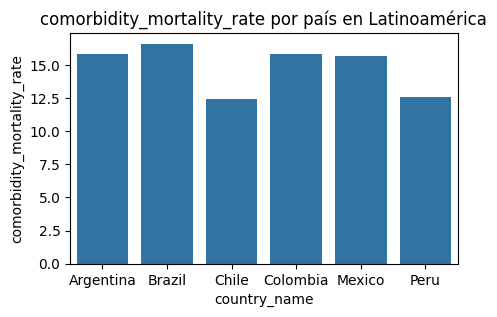

In [26]:

#Diagrams bar para cada país en data_latinoamerica_paises con 6 columnas:
for i in data.columns:
    if i not in ['location_key','date','country_code','country_name','latitude','longitude','cumulative_confirmed','cumulative_deceased','cumulative_recovered','cumulative_vaccine_doses_administered','new_recovered']:
        fig, ax = plt.subplots(figsize=(5,3))
        sns.barplot(x = 'country_name', 
                    y = i, 
                    data = data, 
                    ax = ax)
        plt.title(f'{i} por país en Latinoamérica')
        plt.show()

#### 4.2 Histogramas gráficos de densidad y gráficos de densidad para entender la distribución de la incidencia de COVID-19 y las tasas de vacunación.

Se repite el proceso con un ciclo for, pero ahora vamos a realizar histogramas para ver la distribución de algunos de los datos:

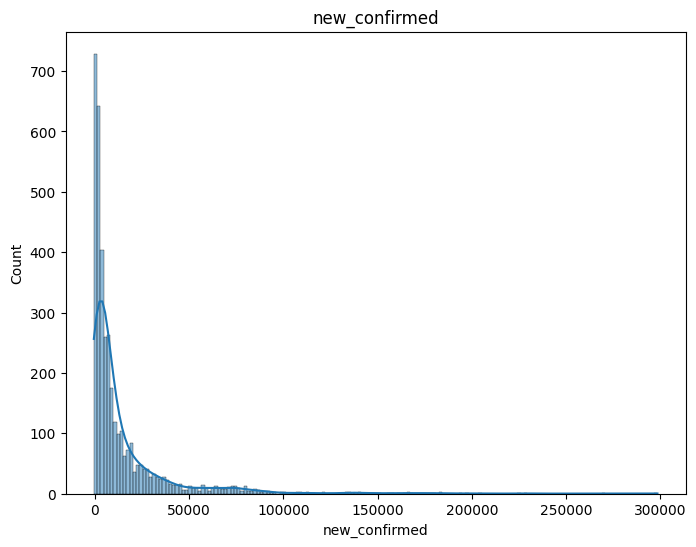

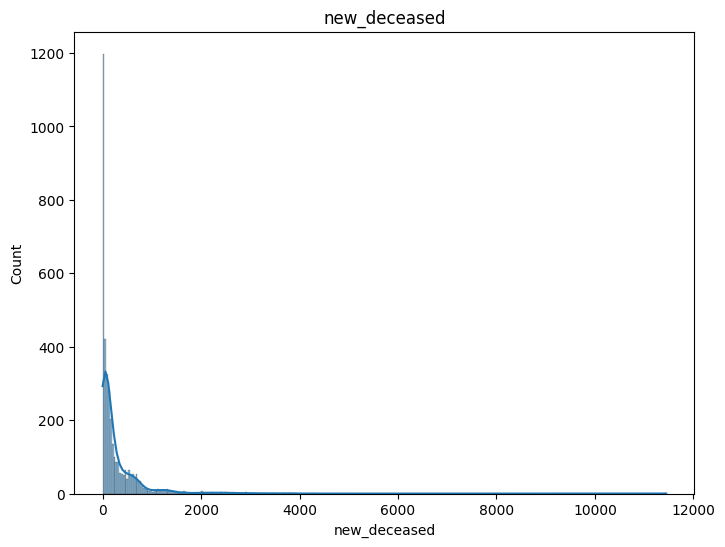

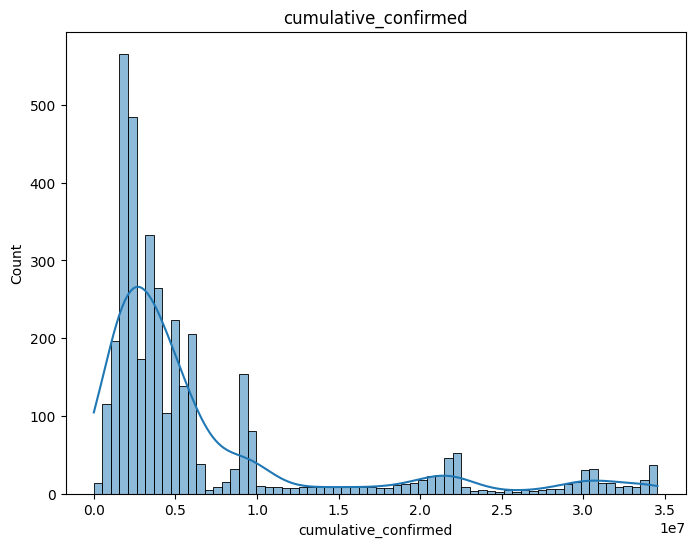

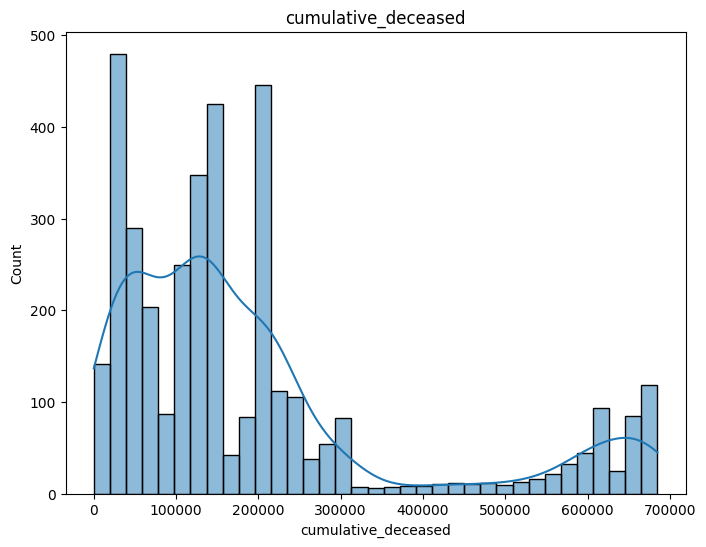

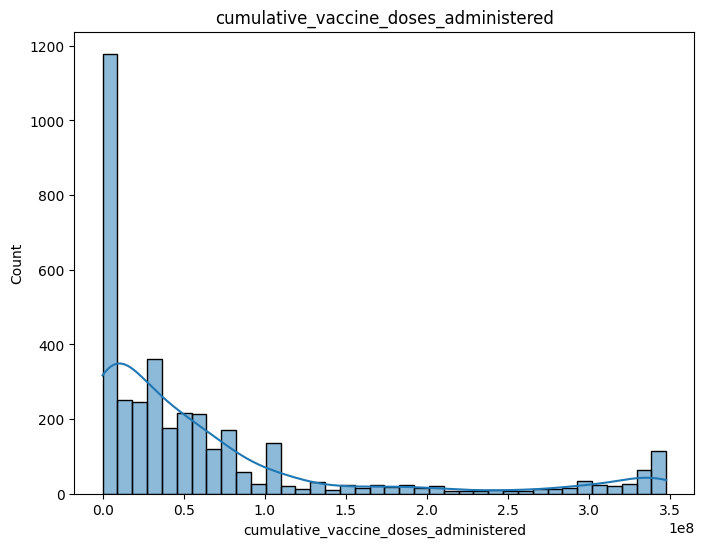

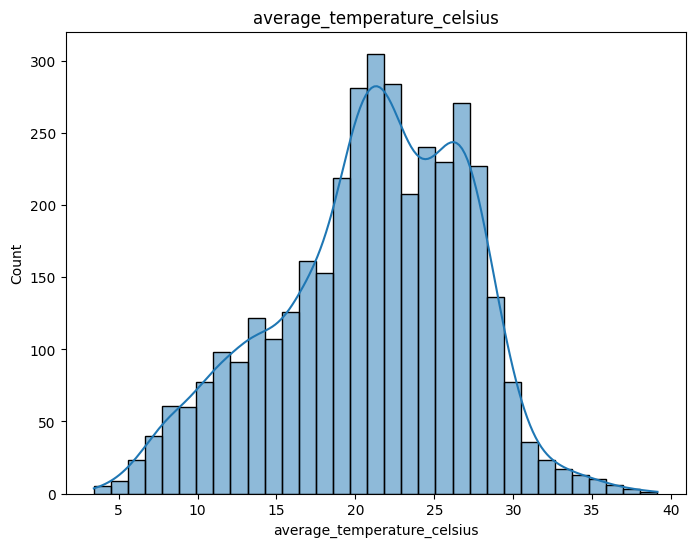

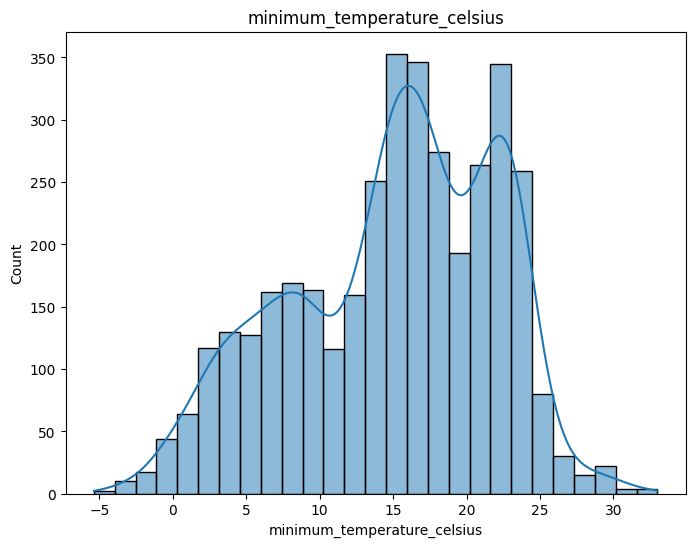

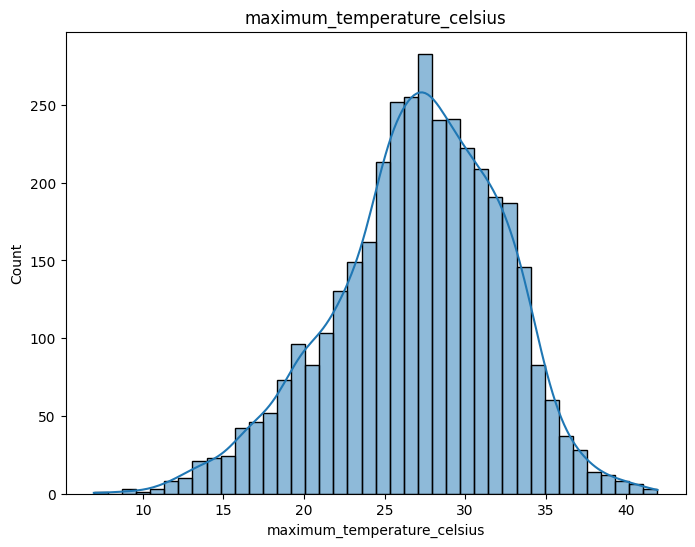

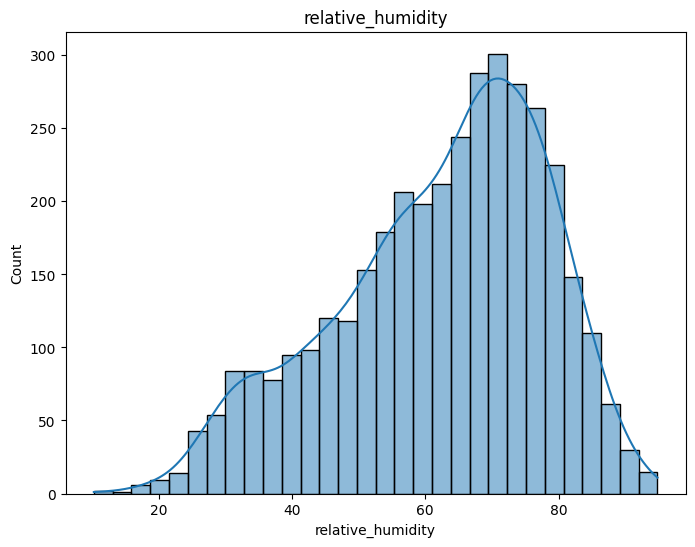

In [27]:
#Establecemos las columnas que vamos a analizar:
lista_columnas_9=['new_confirmed','new_deceased','cumulative_confirmed','cumulative_deceased',
                  'cumulative_vaccine_doses_administered','average_temperature_celsius','minimum_temperature_celsius',
                  'maximum_temperature_celsius','relative_humidity']

#Creamos histogramas de las variables numéricas, partiendo de las columnas establecidas:
for i in data[lista_columnas_9]:
    fig, ax = plt.subplots(figsize=(8,6))
    sns.histplot(data[i], kde=True)  #kde crea gráficos de línea de densidad
    plt.title(i)
    plt.show()

#### 4.3 Gráficos de dispersión para explorar posibles relaciones entre las variables.

Procederemos a realizar un análisis enfocados en algunas variables específicas. En este caso vamos a analizar la variable average_temperature y la variable new_confirmed, con el fin de tratar de entender el comportamiento de los casos respecto a la temperatura:

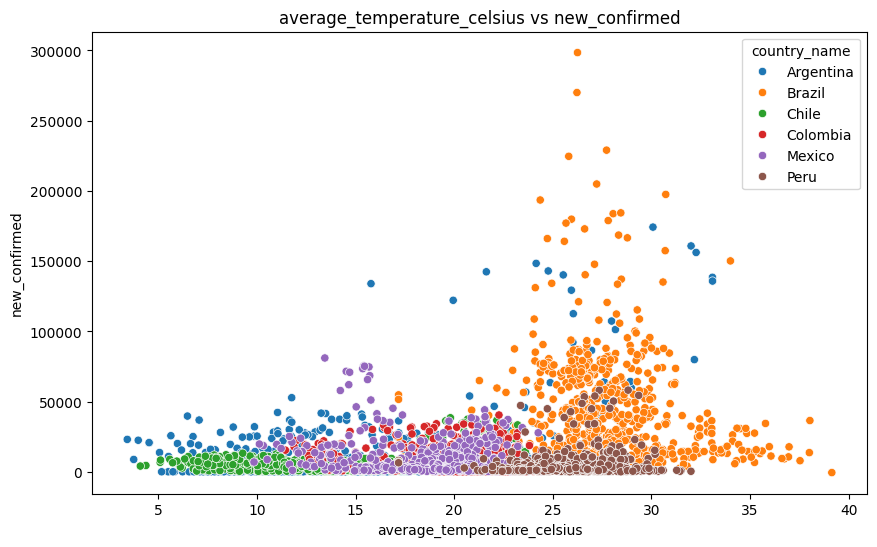

In [28]:

# Gráfica de average_temperature_celsius vs new_confirmed:
fig, ax = plt.subplots(figsize=(10, 6)) #Creamos la figura y el eje.
sns.scatterplot(x = 'average_temperature_celsius', 
                y = 'new_confirmed', 
                data = data, 
                hue='country_name') #Gráfico de dispersión, hue añade una dimensión, con colores diferentes para cada país.
plt.title('average_temperature_celsius vs new_confirmed')
plt.show()


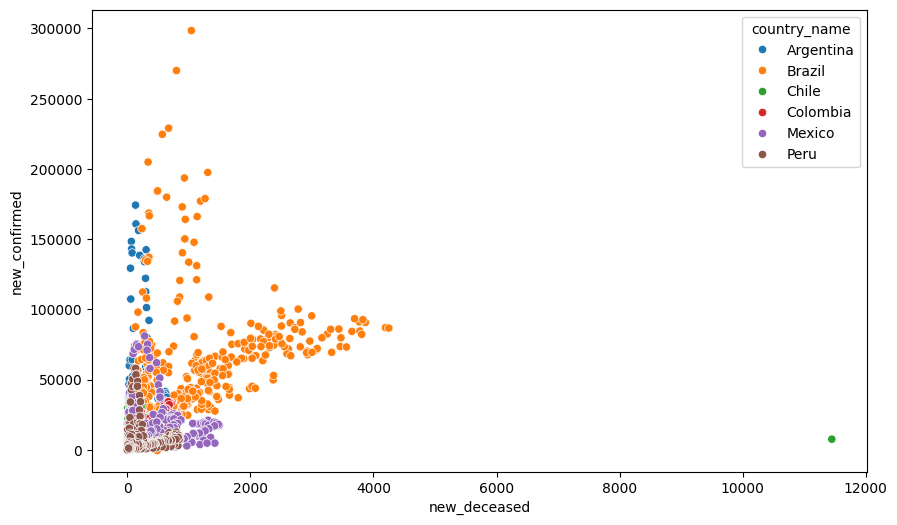

In [83]:
# Gráfica de average_temperature_celsius vs new_confirmed:
fig, ax = plt.subplots(figsize=(10, 6)) #Creamos la figura y el eje.
sns.scatterplot(x = 'new_deceased', 
                y = 'new_confirmed', 
                data = data, 
                hue='country_name') #Gráfico de dispersión, hue añade una dimensión, con colores diferentes para cada país.
#plt.title('average_temperature_celsius vs new_confirmed')
plt.show()


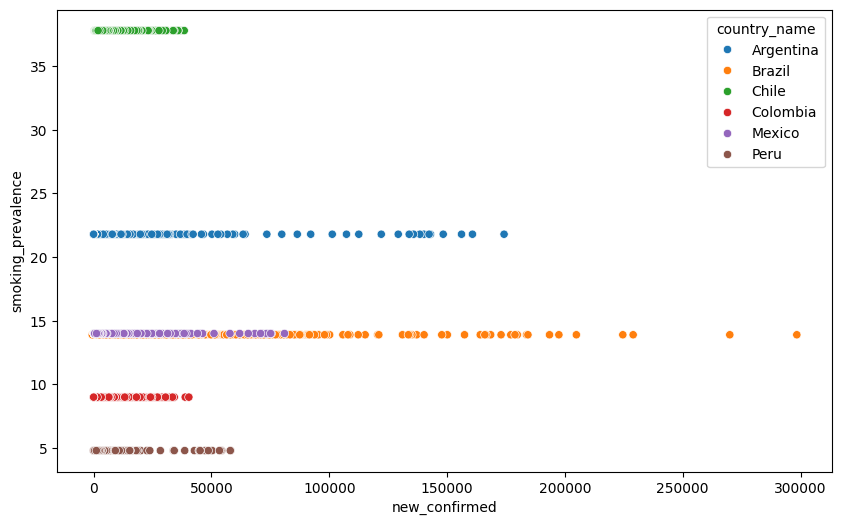

In [84]:
# Gráfica de average_temperature_celsius vs new_confirmed:
fig, ax = plt.subplots(figsize=(10, 6)) #Creamos la figura y el eje.
sns.scatterplot(x = 'new_confirmed', 
                y = 'smoking_prevalence', 
                data = data, 
                hue='country_name') #Gráfico de dispersión, hue añade una dimensión, con colores diferentes para cada país.
#plt.title('average_temperature_celsius vs new_confirmed')
plt.show()


#### 4.4 Violinplot de las variables que “Sí” tenga cambios de valores.

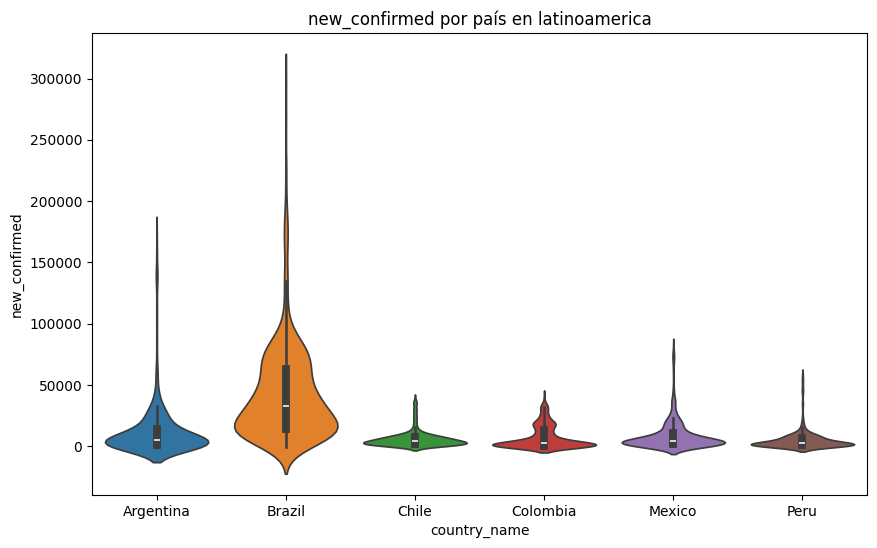

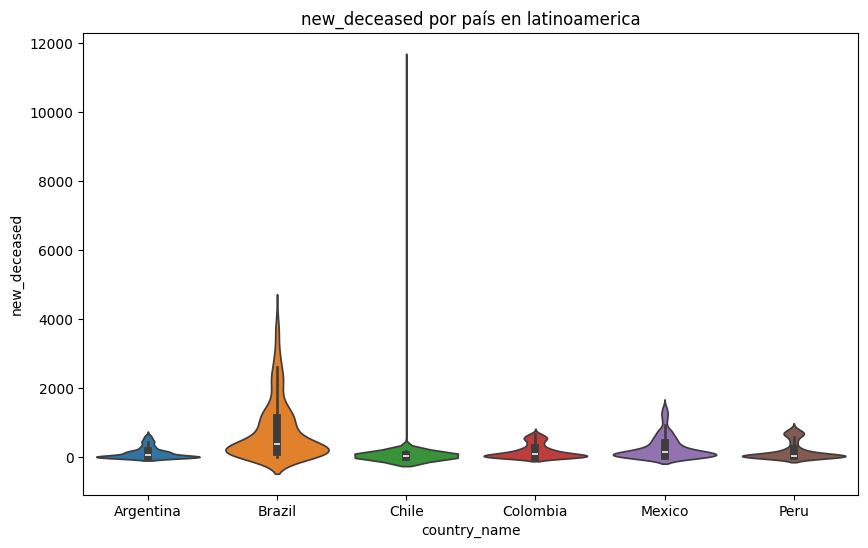

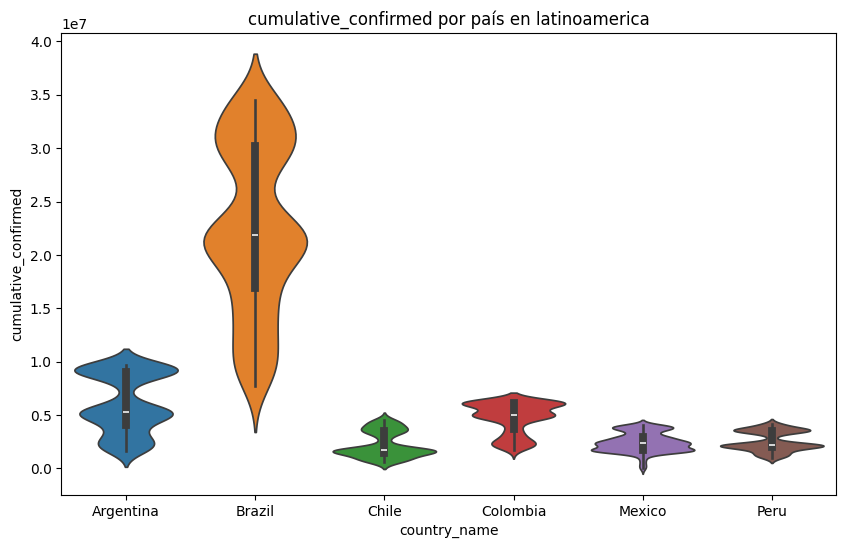

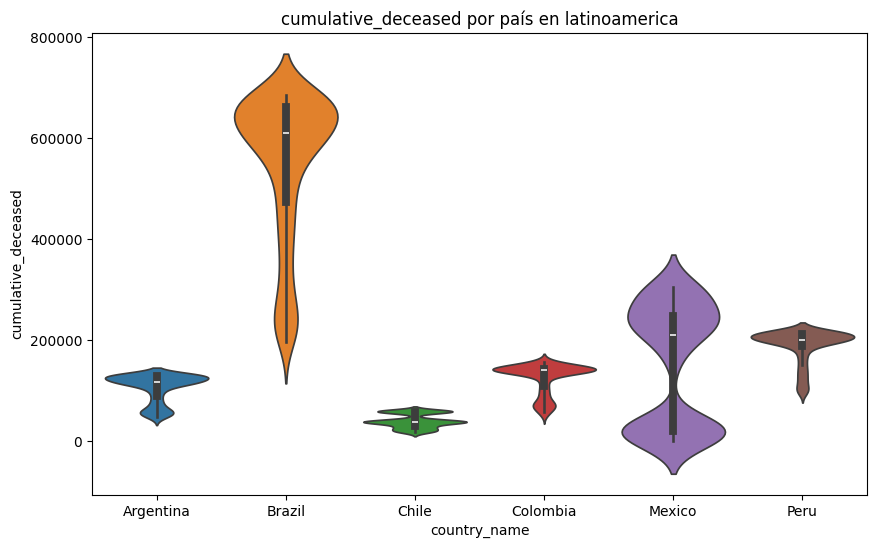

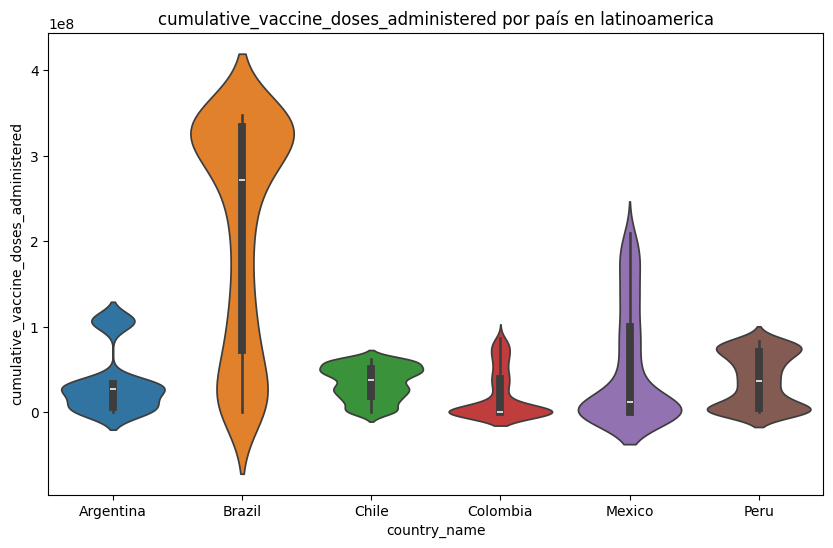

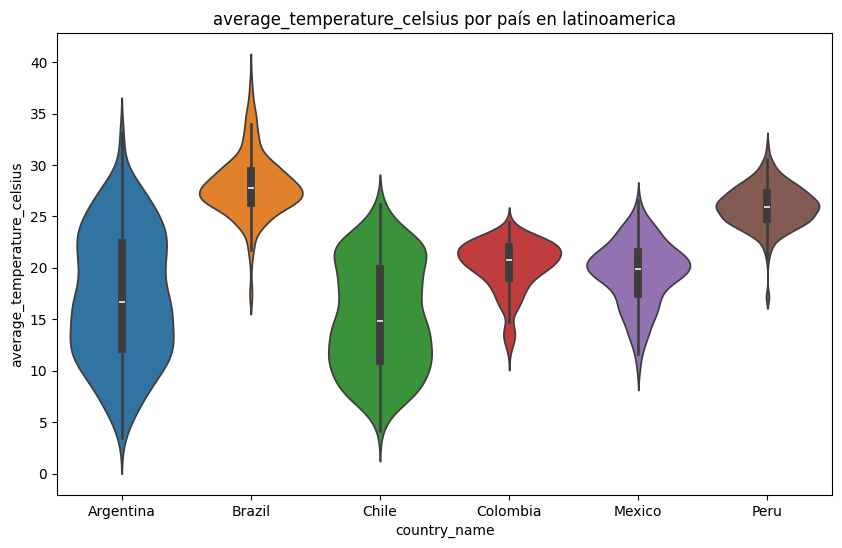

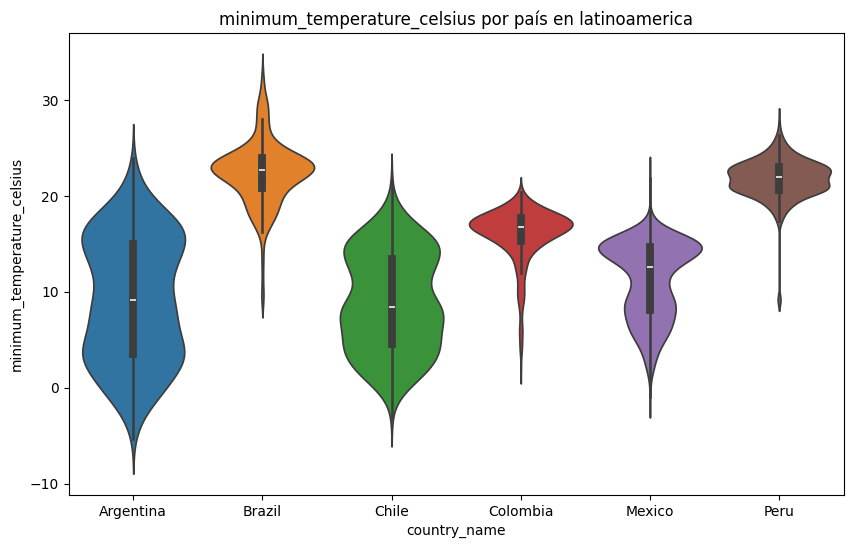

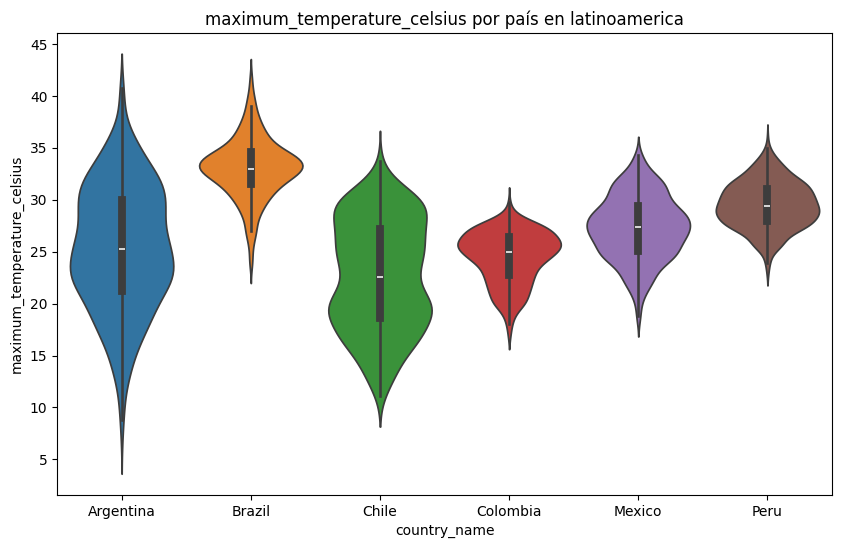

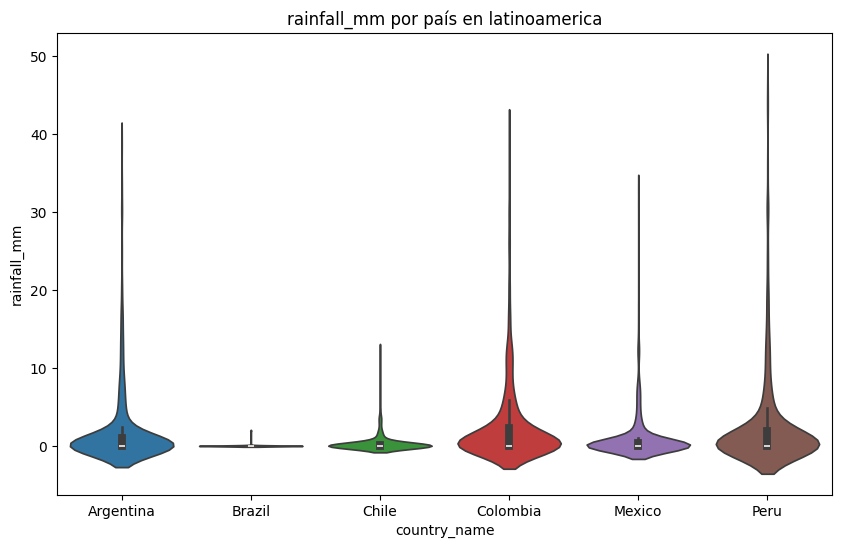

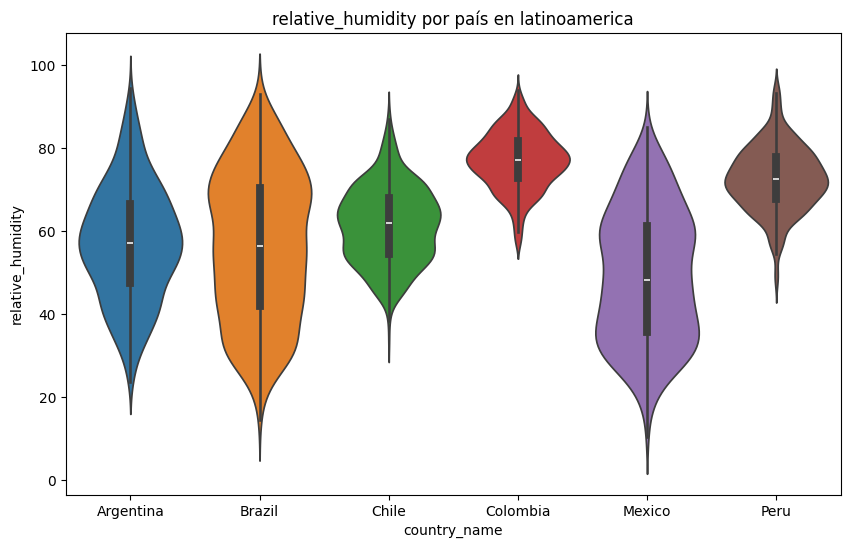

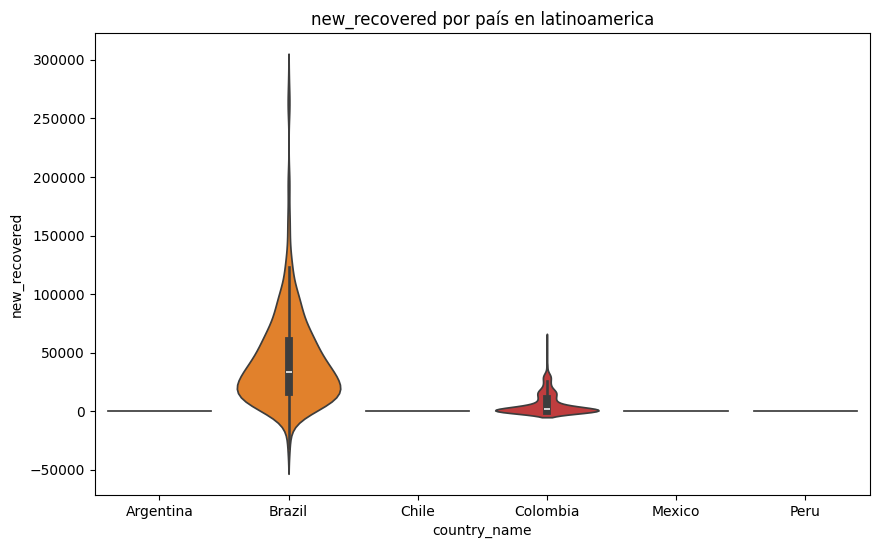

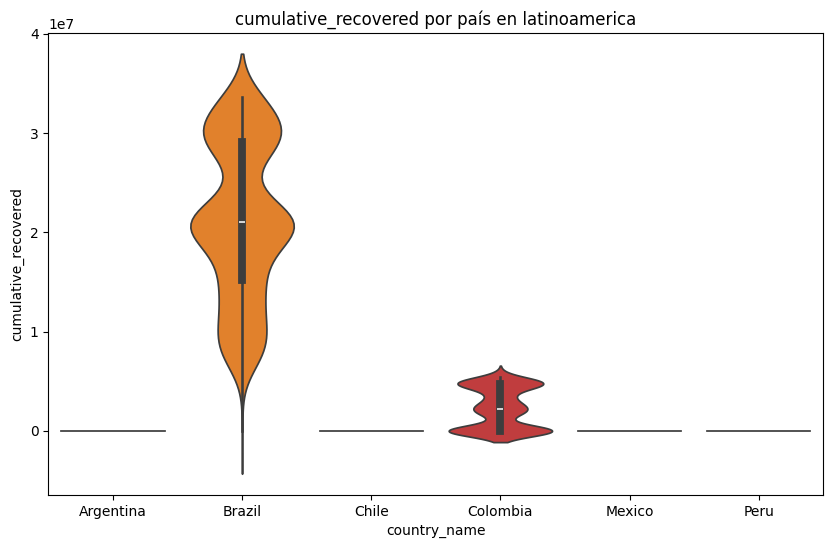

In [29]:
# Se crea un dataframe con las columnas mayores a 6 porque son las que tienen valores diferentes para cada país.
columnas_mayores_6=[]
for i in data.columns:
    if i not in ['location_key','date','country_code','latitude','longitude']:
        if data[i].nunique()>6:
            columnas_mayores_6.append(i)
#agregar a columnas_mayores_6 la columna country_name para poder hacer analisis por país.
columnas_mayores_6.append('country_name')

# Se crea un dataframe con las columnas mayores a 6
data_mayores_6=data[columnas_mayores_6]


# violinplot en todos los paises para variables numericas
for i in data_mayores_6.columns:
    if i not in ['location_key','date','country_code','latitude','longitude','country_name']:
        fig, ax = plt.subplots(figsize=(10, 6))
        sns.violinplot(x='country_name', y=i, data=data_mayores_6,hue='country_name')
        plt.title(f'{i} por país en latinoamerica')
        plt.show()


### 5. Identificación de Tendencias y Patrones: 

Deberás analizar detalladamente los datos relacionados con la incidencia de COVID-19 y las tasas de vacunación, buscando identificar tendencias a largo plazo y patrones estacionales o geográficos. Por ejemplo, puedes investigar la posible influencia de factores como la temperatura en la propagación de la enfermedad, así como también examinar cómo varían los índices de vacunación en diferentes regiones o en distintos momentos del año. Este análisis te permitirá prever áreas de alta prioridad para la asignación de recursos y la implementación de medidas preventivas y de control.



In [ ]:
data.dtypes

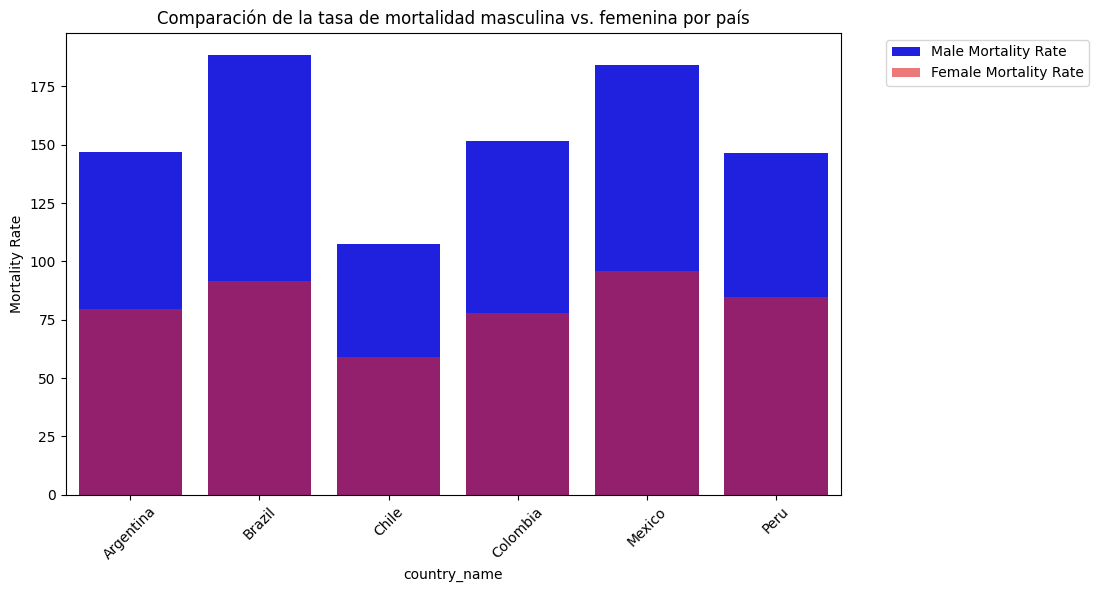

In [30]:
# Grafica de mortalidad por genero. Tasa de Mortalidad entendida en Cantidad de muertes cada 1.000.000 de habitantes

plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='country_name', y='adult_male_mortality_rate', color='blue', label='Male Mortality Rate')
sns.barplot(data=data, x='country_name', y='adult_female_mortality_rate', color='red', alpha=0.6, label='Female Mortality Rate')
plt.xticks(rotation=45)
plt.ylabel('Mortality Rate')
plt.title('Comparación de la tasa de mortalidad masculina vs. femenina por país')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

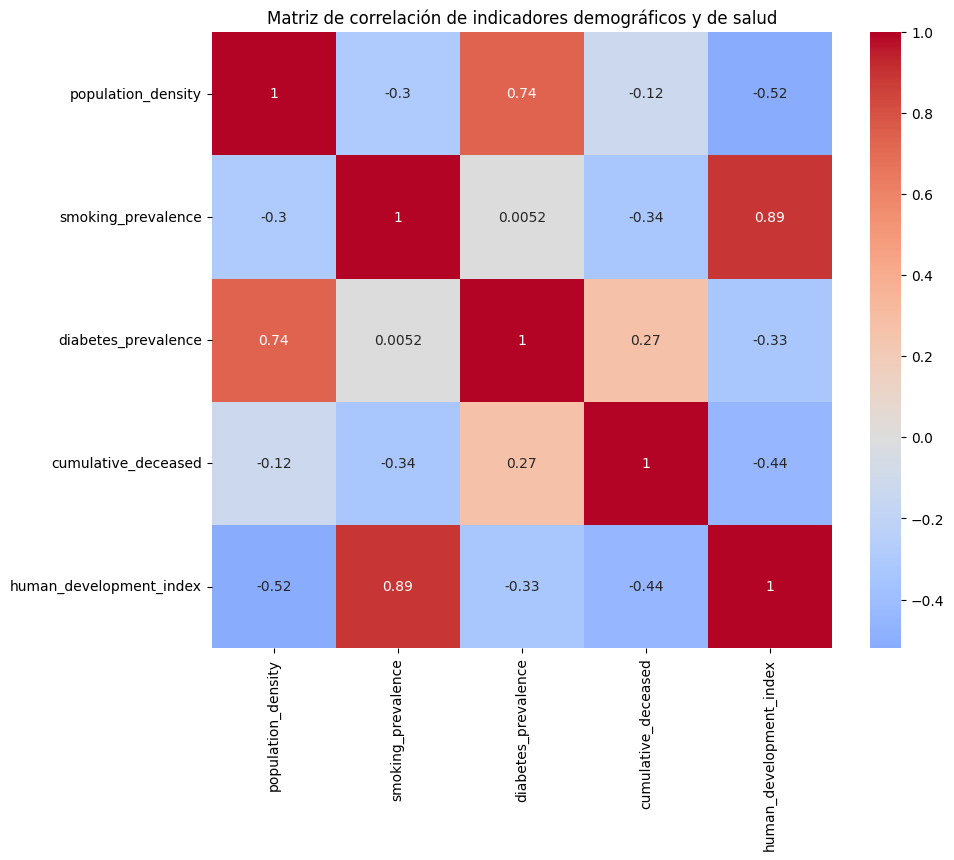

In [31]:
# Selecciono las variables númericas que quiero correlacionar
columns = ['population_density', 'smoking_prevalence', 'diabetes_prevalence', 'cumulative_deceased', 'human_development_index']
correlation_matrix = data[columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de correlación de indicadores demográficos y de salud')
plt.show()

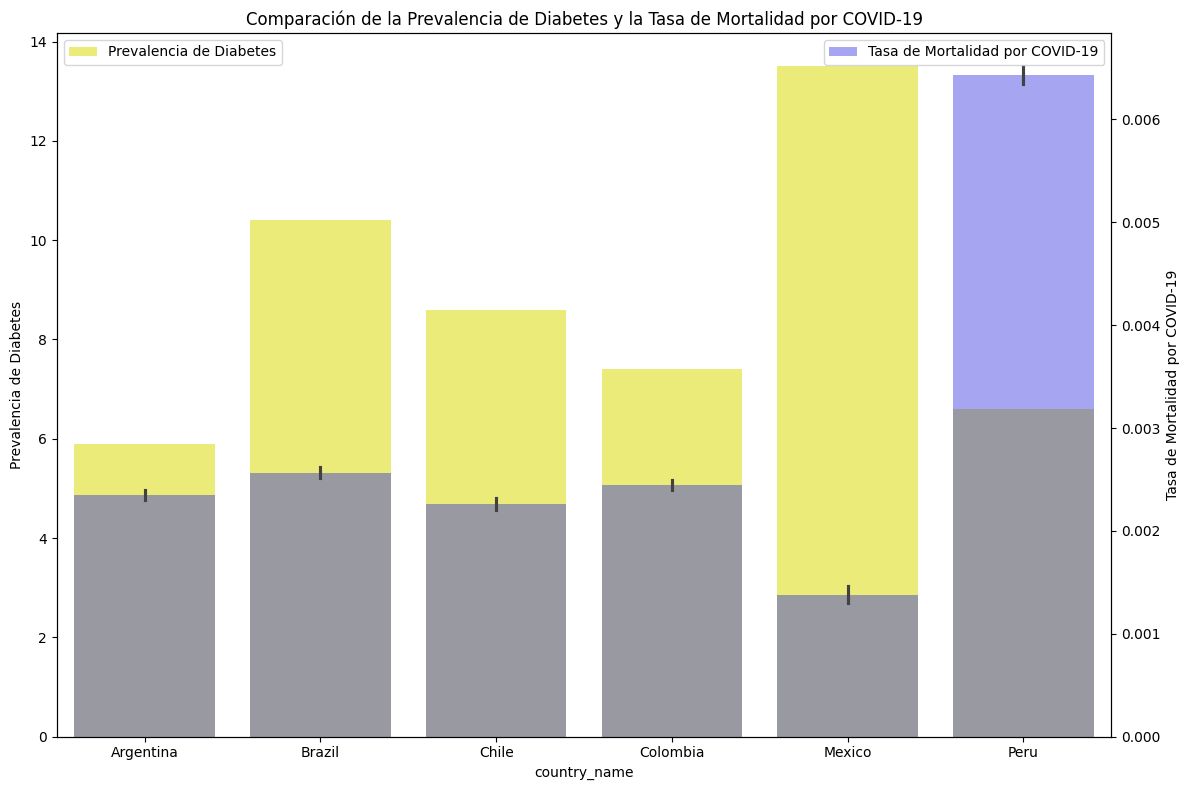

In [32]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

sns.barplot(data=data, 
            x= data['country_name'], 
            y= data['diabetes_prevalence'], 
            color='yellow', 
            label='Prevalencia de Diabetes',
            ax=ax,
            alpha=0.6
)

ax2 = ax.twinx()

sns.barplot(data=data, 
            x= data['country_name'], 
            y= data['cumulative_deceased'] / data['population'],
            color='Blue', 
            label='Tasa de Mortalidad por COVID-19', 
            ax=ax2,
            alpha=0.4)

plt.xticks(rotation=90)
ax.set_ylabel('Prevalencia de Diabetes')
ax.legend(loc='upper left')
ax2.legend(loc='upper right')
ax2.set_ylabel('Tasa de Mortalidad por COVID-19')
plt.title('Comparación de la Prevalencia de Diabetes y la Tasa de Mortalidad por COVID-19')
plt.tight_layout()
plt.show()

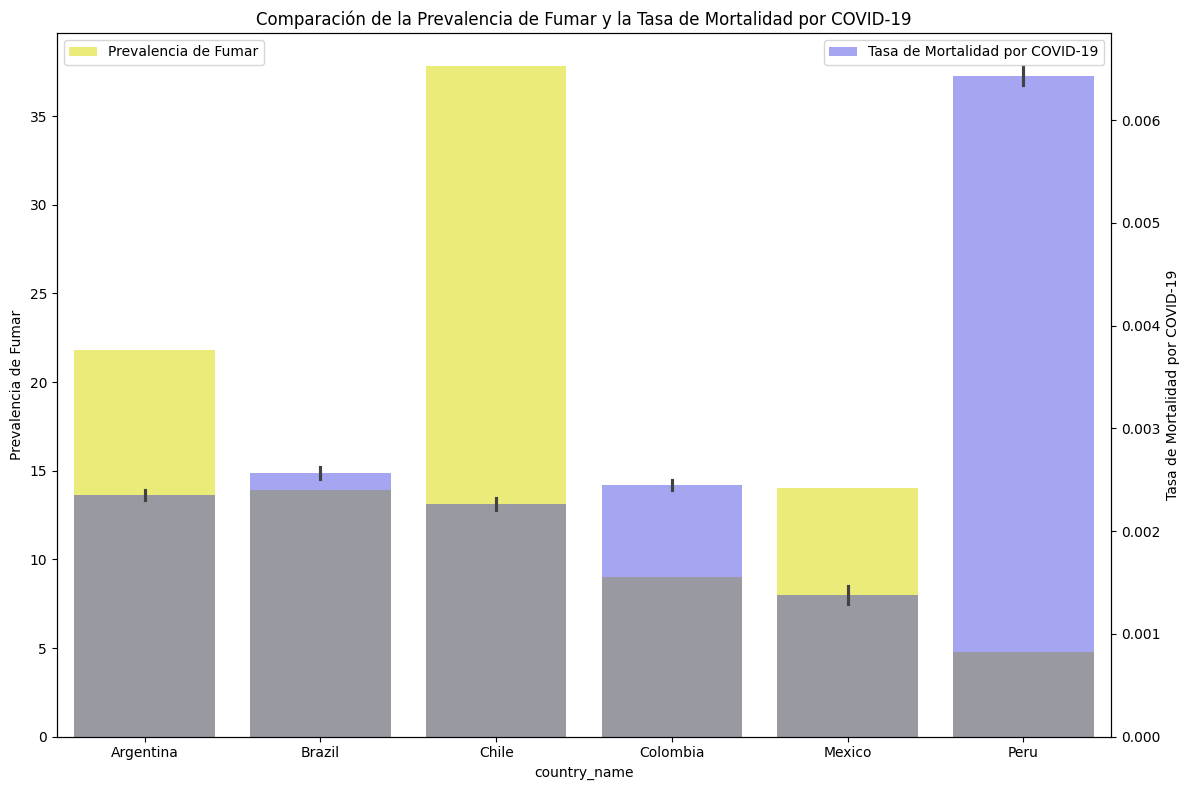

In [33]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

sns.barplot(data=data, 
            x= data['country_name'], 
            y= data['smoking_prevalence'], 
            color='yellow', 
            label='Prevalencia de Fumar',
            ax=ax,
            alpha=0.6)

ax2 = ax.twinx()

sns.barplot(data=data, 
            x= data['country_name'], 
            y= data['cumulative_deceased'] / data['population'], 
            color='Blue', 
            label='Tasa de Mortalidad por COVID-19', 
            ax=ax2,
            alpha=0.4)

plt.xticks(rotation=90)
ax.set_ylabel('Prevalencia de Fumar')
ax2.set_ylabel('Tasa de Mortalidad por COVID-19')
ax.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.title('Comparación de la Prevalencia de Fumar y la Tasa de Mortalidad por COVID-19')
plt.tight_layout()
plt.show()

### 6. Personalización de Visualizaciones: Personaliza las visualizaciones para hacerlas más informativas y atractivas.

Esto incluirá ajustar paletas de colores, añadir etiquetas y leyendas, tamaño, y utilizar títulos descriptivos para cada gráfico.

Hemos personalizados las visualizaciones con nuestra paleta de colores personalizada con los colores corporativos de Biogenesys: azul fondo (#0d4364), celeste letra (#268dcb), blanco letra (# ffffff) y otra paleta personalizada cuando necesitabamos identificar 6 variables (mis paises evaluados)
Añadimos etiquetas y leyendas, tamaño y utilizamos títulos descriptivos para cada gráfico.

In [5]:
# Procedimiento para definir nuestra paletta de colores personalizada
# según los colores Biogensys, cuando nuestro gráfico sólo necesita de 2 a 3 colores
custom_palette = ["#0d4364", "#268dcb", "#ffffff"]
sns.set_palette(custom_palette)

# definir paletta de colores personalizada
# cuando nuestro gráfico necesita tener 6 colores
custom_palette = ["#0d4364", "#268dcb", "#01FF62","#FF00FF", "#FD6E03", "#C00000"]
sns.set_palette(custom_palette)


## Avance 3

### 2. Importa las librerías que necesites utilizar en este avance.

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

data = pd.read_csv("DatosFinalesFiltrado.csv",
                   sep = ',')

In [41]:
import warnings

# Ignorar todos los warnings
warnings.filterwarnings("ignore")

### 3. Realiza un análisis exploratorio detallado utilizando técnicas avanzadas de Pandas y Numpy, centrándote en el análisis de series temporales para comprender la evolución de elementos específicos del conjunto de datos. Para ello, puedes empezar por identificar tendencias, estacionalidad y patrones temporales relevantes, análisis de autocorrelación y descomposición de series temporales. 


In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3720 entries, 0 to 3719
Data columns (total 50 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   location_key                           3720 non-null   object 
 1   date                                   3720 non-null   object 
 2   country_code                           3720 non-null   object 
 3   country_name                           3720 non-null   object 
 4   new_confirmed                          3720 non-null   float64
 5   new_deceased                           3720 non-null   float64
 6   cumulative_confirmed                   3720 non-null   float64
 7   cumulative_deceased                    3720 non-null   float64
 8   cumulative_vaccine_doses_administered  3720 non-null   float64
 9   population                             3720 non-null   float64
 10  population_male                        3720 non-null   float64
 11  popu

In [10]:
data["date"] = pd.to_datetime(data["date"])

# luego la convertimos en índice de nuestro dataset
data = data.set_index("date")

data

location_key country_code country_name  new_confirmed  \
date                                                               
2021-01-02           AR           AR    Argentina         7767.0   
2021-01-03           AR           AR    Argentina         4934.0   
2021-01-04           AR           AR    Argentina        13953.0   
2021-01-05           AR           AR    Argentina        14085.0   
2021-01-06           AR           AR    Argentina        14496.0   
...                 ...          ...          ...            ...   
2022-09-09           PE           PE         Peru         2399.0   
2022-09-10           PE           PE         Peru         1773.0   
2022-09-11           PE           PE         Peru          813.0   
2022-09-12           PE           PE         Peru          441.0   
2022-09-13           PE           PE         Peru         1150.0   

            new_deceased  cumulative_confirmed  cumulative_deceased  \
date                                                                  
2021-01-02         166.0             1670634.0              46688.0   
2021-01-03         157.0             1675568.0              46845.0   
2021-01-04         157.0             1689521.0              47002.0   
2021-01-05         160.0             1703606.0              47162.0   
2021-01-06         131.0             1718102.0              47293.0   
...                  ...                   ...                  ...   
2022-09-09          42.0             4123435.0             216045.0   
2022-09-10          41.0             4125208.0             216086.0   
2022-09-11          39.0             4126021.0             216125.0   
2022-09-12          26.0             4126462.0             216151.0   
2022-09-13          22.0             4127612.0             216173.0   

            cumulative_vaccine_doses_administered  population  \
date                                                            
2021-01-02                                20334.0  44938712.0   
2021-01-03                                20529.0  44938712.0   
2021-01-04                                25164.0  44938712.0   
2021-01-05                                29852.0  44938712.0   
2021-01-06                                34162.0  44938712.0   
...                                           ...         ...   
2022-09-09                             83589950.0  29381884.0   
2022-09-10                             83614744.0  29381884.0   
2022-09-11                             83624932.0  29381884.0   
2022-09-12                             83624934.0  29381884.0   
2022-09-13                                    0.0  29381884.0   

            population_male  ...  population_largest_city  area_rural_sq_km  \
date                         ...                                              
2021-01-02       19523766.0  ...               15057273.0         2690269.0   
2021-01-03       19523766.0  ...               15057273.0         2690269.0   
2021-01-04       19523766.0  ...               15057273.0         2690269.0   
2021-01-05       19523766.0  ...               15057273.0         2690269.0   
2021-01-06       19523766.0  ...               15057273.0         2690269.0   
...                     ...  ...                      ...               ...   
2022-09-09       14450757.0  ...               10554712.0         1256339.0   
2022-09-10       14450757.0  ...               10554712.0         1256339.0   
2022-09-11       14450757.0  ...               10554712.0         1256339.0   
2022-09-12       14450757.0  ...               10554712.0         1256339.0   
2022-09-13       14450757.0  ...               10554712.0         1256339.0   

            area_urban_sq_km  life_expectancy  adult_male_mortality_rate  \
date                                                                       
2021-01-02           55032.0           76.520                    147.086   
2021-01-03           55032.0           76.520                    147.086   
2021-01-04           550

In [11]:
data['week'] = data.index.isocalendar().week
data

location_key country_code country_name  new_confirmed  \
date                                                               
2021-01-02           AR           AR    Argentina         7767.0   
2021-01-03           AR           AR    Argentina         4934.0   
2021-01-04           AR           AR    Argentina        13953.0   
2021-01-05           AR           AR    Argentina        14085.0   
2021-01-06           AR           AR    Argentina        14496.0   
...                 ...          ...          ...            ...   
2022-09-09           PE           PE         Peru         2399.0   
2022-09-10           PE           PE         Peru         1773.0   
2022-09-11           PE           PE         Peru          813.0   
2022-09-12           PE           PE         Peru          441.0   
2022-09-13           PE           PE         Peru         1150.0   

            new_deceased  cumulative_confirmed  cumulative_deceased  \
date                                                                  
2021-01-02         166.0             1670634.0              46688.0   
2021-01-03         157.0             1675568.0              46845.0   
2021-01-04         157.0             1689521.0              47002.0   
2021-01-05         160.0             1703606.0              47162.0   
2021-01-06         131.0             1718102.0              47293.0   
...                  ...                   ...                  ...   
2022-09-09          42.0             4123435.0             216045.0   
2022-09-10          41.0             4125208.0             216086.0   
2022-09-11          39.0             4126021.0             216125.0   
2022-09-12          26.0             4126462.0             216151.0   
2022-09-13          22.0             4127612.0             216173.0   

            cumulative_vaccine_doses_administered  population  \
date                                                            
2021-01-02                                20334.0  44938712.0   
2021-01-03                                20529.0  44938712.0   
2021-01-04                                25164.0  44938712.0   
2021-01-05                                29852.0  44938712.0   
2021-01-06                                34162.0  44938712.0   
...                                           ...         ...   
2022-09-09                             83589950.0  29381884.0   
2022-09-10                             83614744.0  29381884.0   
2022-09-11                             83624932.0  29381884.0   
2022-09-12                             83624934.0  29381884.0   
2022-09-13                                    0.0  29381884.0   

            population_male  ...  area_rural_sq_km  area_urban_sq_km  \
date                         ...                                       
2021-01-02       19523766.0  ...         2690269.0           55032.0   
2021-01-03       19523766.0  ...         2690269.0           55032.0   
2021-01-04       19523766.0  ...         2690269.0           55032.0   
2021-01-05       19523766.0  ...         2690269.0           55032.0   
2021-01-06       19523766.0  ...         2690269.0           55032.0   
...                     ...  ...               ...               ...   
2022-09-09       14450757.0  ...         1256339.0           16425.0   
2022-09-10       14450757.0  ...         1256339.0           16425.0   
2022-09-11       14450757.0  ...         1256339.0           16425.0   
2022-09-12       14450757.0  ...         1256339.0           16425.0   
2022-09-13       14450757.0  ...         1256339.0           16425.0   

            life_expectancy  adult_male_mortality_rate  \
date                                                     
2021-01-02           76.520                    147.086   
2021-01-03           76.520                    147.086   
2021-01-04           76.520                    147.086   
2021-01-05           76.520                    147.086   
2021-01-06           76.520                    147.086   
...          

In [12]:
data_2021 = data.loc[
    (data.index >= '2021-01-01') & 
    (data.index <= '2021-12-31')
]
data_2021

location_key country_code country_name  new_confirmed  \
date                                                               
2021-01-02           AR           AR    Argentina         7767.0   
2021-01-03           AR           AR    Argentina         4934.0   
2021-01-04           AR           AR    Argentina        13953.0   
2021-01-05           AR           AR    Argentina        14085.0   
2021-01-06           AR           AR    Argentina        14496.0   
...                 ...          ...          ...            ...   
2021-12-27           PE           PE         Peru         3261.0   
2021-12-28           PE           PE         Peru         4270.0   
2021-12-29           PE           PE         Peru         4340.0   
2021-12-30           PE           PE         Peru         5220.0   
2021-12-31           PE           PE         Peru         4290.0   

            new_deceased  cumulative_confirmed  cumulative_deceased  \
date                                                                  
2021-01-02         166.0             1670634.0              46688.0   
2021-01-03         157.0             1675568.0              46845.0   
2021-01-04         157.0             1689521.0              47002.0   
2021-01-05         160.0             1703606.0              47162.0   
2021-01-06         131.0             1718102.0              47293.0   
...                  ...                   ...                  ...   
2021-12-27          29.0             2285854.0             202515.0   
2021-12-28          37.0             2290124.0             202552.0   
2021-12-29          40.0             2294464.0             202592.0   
2021-12-30          45.0             2299684.0             202637.0   
2021-12-31          37.0             2303974.0             202674.0   

            cumulative_vaccine_doses_administered  population  \
date                                                            
2021-01-02                                20334.0  44938712.0   
2021-01-03                                20529.0  44938712.0   
2021-01-04                                25164.0  44938712.0   
2021-01-05                                29852.0  44938712.0   
2021-01-06                                34162.0  44938712.0   
...                                           ...         ...   
2021-12-27                             50186253.0  29381884.0   
2021-12-28                             50515554.0  29381884.0   
2021-12-29                             50800766.0  29381884.0   
2021-12-30                             51020490.0  29381884.0   
2021-12-31                             51092425.0  29381884.0   

            population_male  ...  area_rural_sq_km  area_urban_sq_km  \
date                         ...                                       
2021-01-02       19523766.0  ...         2690269.0           55032.0   
2021-01-03       19523766.0  ...         2690269.0           55032.0   
2021-01-04       19523766.0  ...         2690269.0           55032.0   
2021-01-05       19523766.0  ...         2690269.0           55032.0   
2021-01-06       19523766.0  ...         2690269.0           55032.0   
...                     ...  ...               ...               ...   
2021-12-27       14450757.0  ...         1256339.0           16425.0   
2021-12-28       14450757.0  ...         1256339.0           16425.0   
2021-12-29       14450757.0  ...         1256339.0           16425.0   
2021-12-30       14450757.0  ...         1256339.0           16425.0   
2021-12-31       14450757.0  ...         1256339.0           16425.0   

            life_expectancy  adult_male_mortality_rate  \
date                                                     
2021-01-02           76.520                    147.086   
2021-01-03           76.520                    147.086   
2021-01-04           76.520                    147.086   
2021-01-05           76.520                    147.086   
2021-01-06           76.520                    147.086   
...          

In [13]:
weekly_cases = data_2021.groupby(['country_name', 'week'])[['new_confirmed','new_deceased']].sum().reset_index()
weekly_cases

country_name  week  new_confirmed  new_deceased
0      Argentina     1        85321.0        1093.0
1      Argentina     2        76129.0        1191.0
2      Argentina     3        66250.0        1321.0
3      Argentina     4        58524.0        1199.0
4      Argentina     5        50576.0        1112.0
..           ...   ...            ...           ...
313         Peru    49        10004.0         272.0
314         Peru    50        10637.0         265.0
315         Peru    51        11306.0         257.0
316         Peru    52        21381.0         188.0
317         Peru    53         3355.0         374.0

[318 rows x 4 columns]

In [14]:
weekly_cases['country_name'].unique()

array(['Argentina', 'Brazil', 'Chile', 'Colombia', 'Mexico', 'Peru'],
      dtype=object)

/var/folders/c3/z6r87wbx75s4sytwlm__zbhm0000gn/T/ipykernel_93722/110865310.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2021['month'] = data_2021.index.month # type: ignore


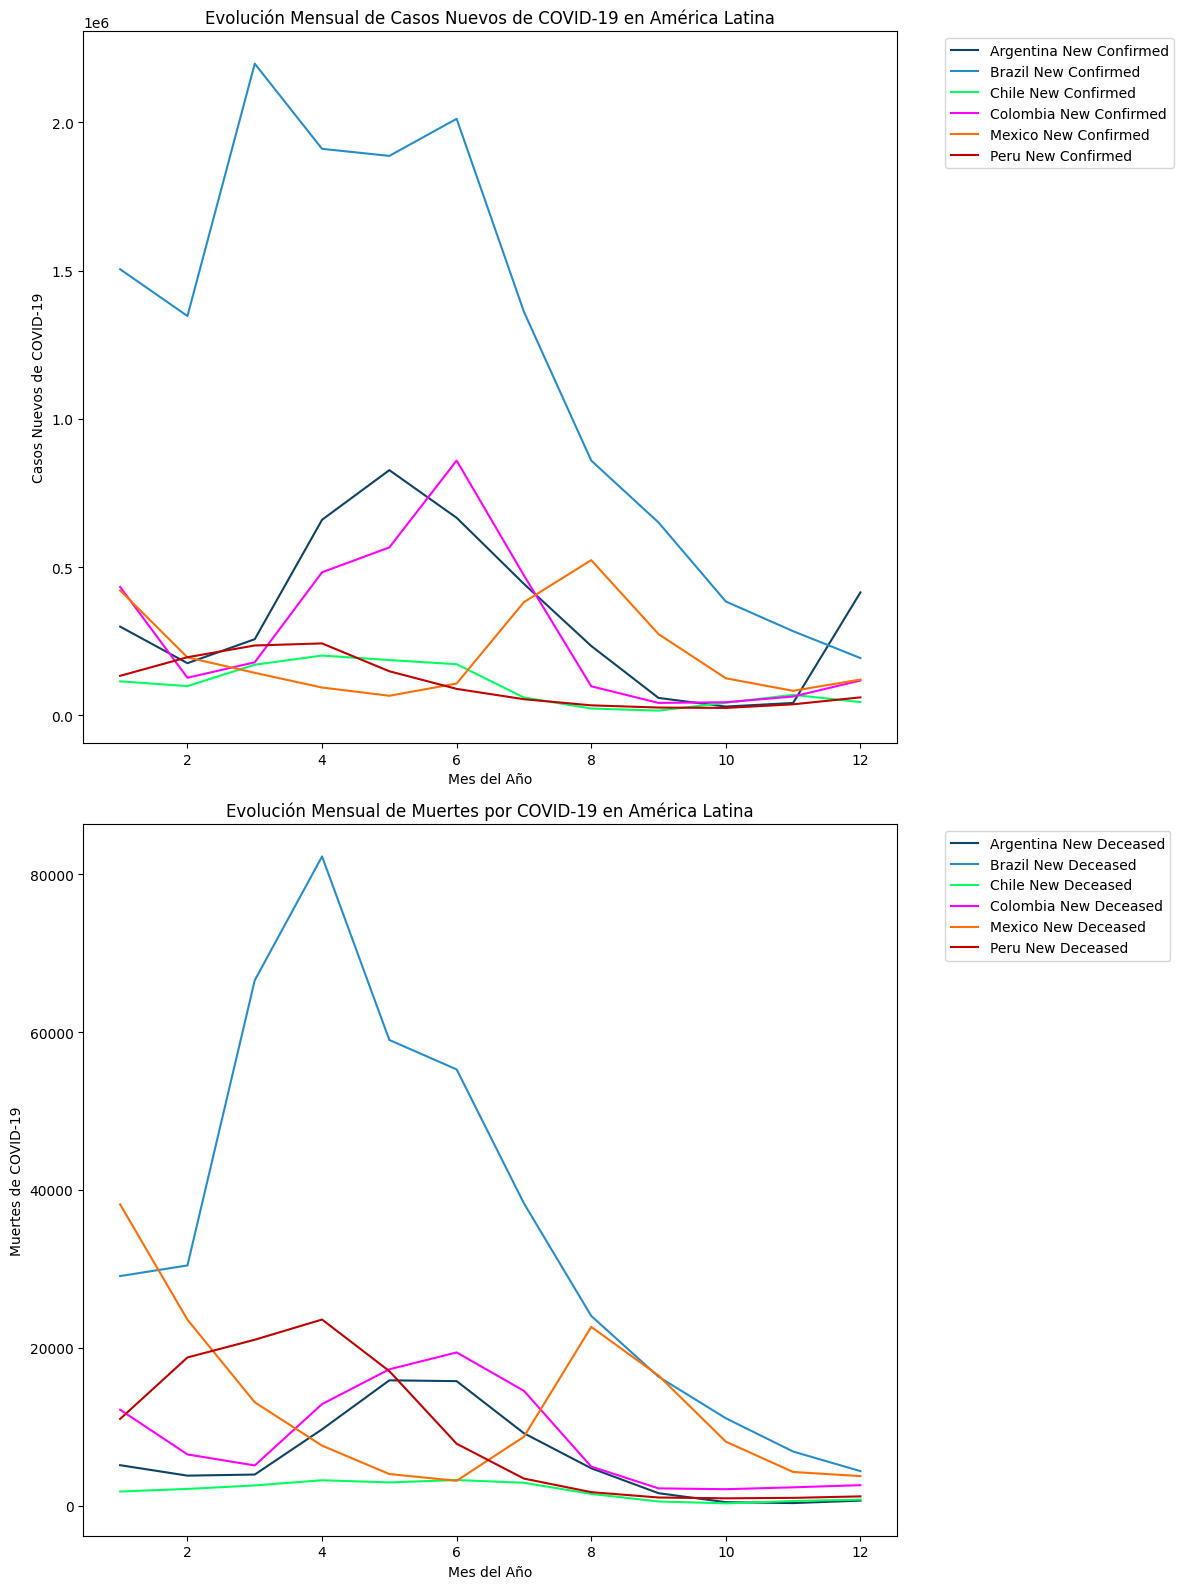

In [15]:

#ahora por vamos por mes del añoaño
data_2021['month'] = data_2021.index.month # type: ignore
yearly_cases = data_2021.groupby(['country_name', 'month'])[['new_confirmed','new_deceased']].sum().reset_index() # type: ignore

fig, ax = plt.subplots(ncols=1, nrows=2, figsize=(12, 16))
for country in yearly_cases['country_name'].unique():
    country_yearly_cases = yearly_cases[yearly_cases['country_name'] == country]
    ax[0].plot(country_yearly_cases['month'], country_yearly_cases['new_confirmed'], label=f'{country} New Confirmed')
    ax[1].plot(country_yearly_cases['month'], country_yearly_cases['new_deceased'], label=f'{country} New Deceased')

ax[0].set_xlabel("Mes del Año")
ax[0].set_ylabel("Casos Nuevos de COVID-19")
ax[0].set_title("Evolución Mensual de Casos Nuevos de COVID-19 en América Latina")
ax[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

ax[1].set_xlabel("Mes del Año")
ax[1].set_ylabel("Muertes de COVID-19")
ax[1].set_title("Evolución Mensual de Muertes por COVID-19 en América Latina")
ax[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

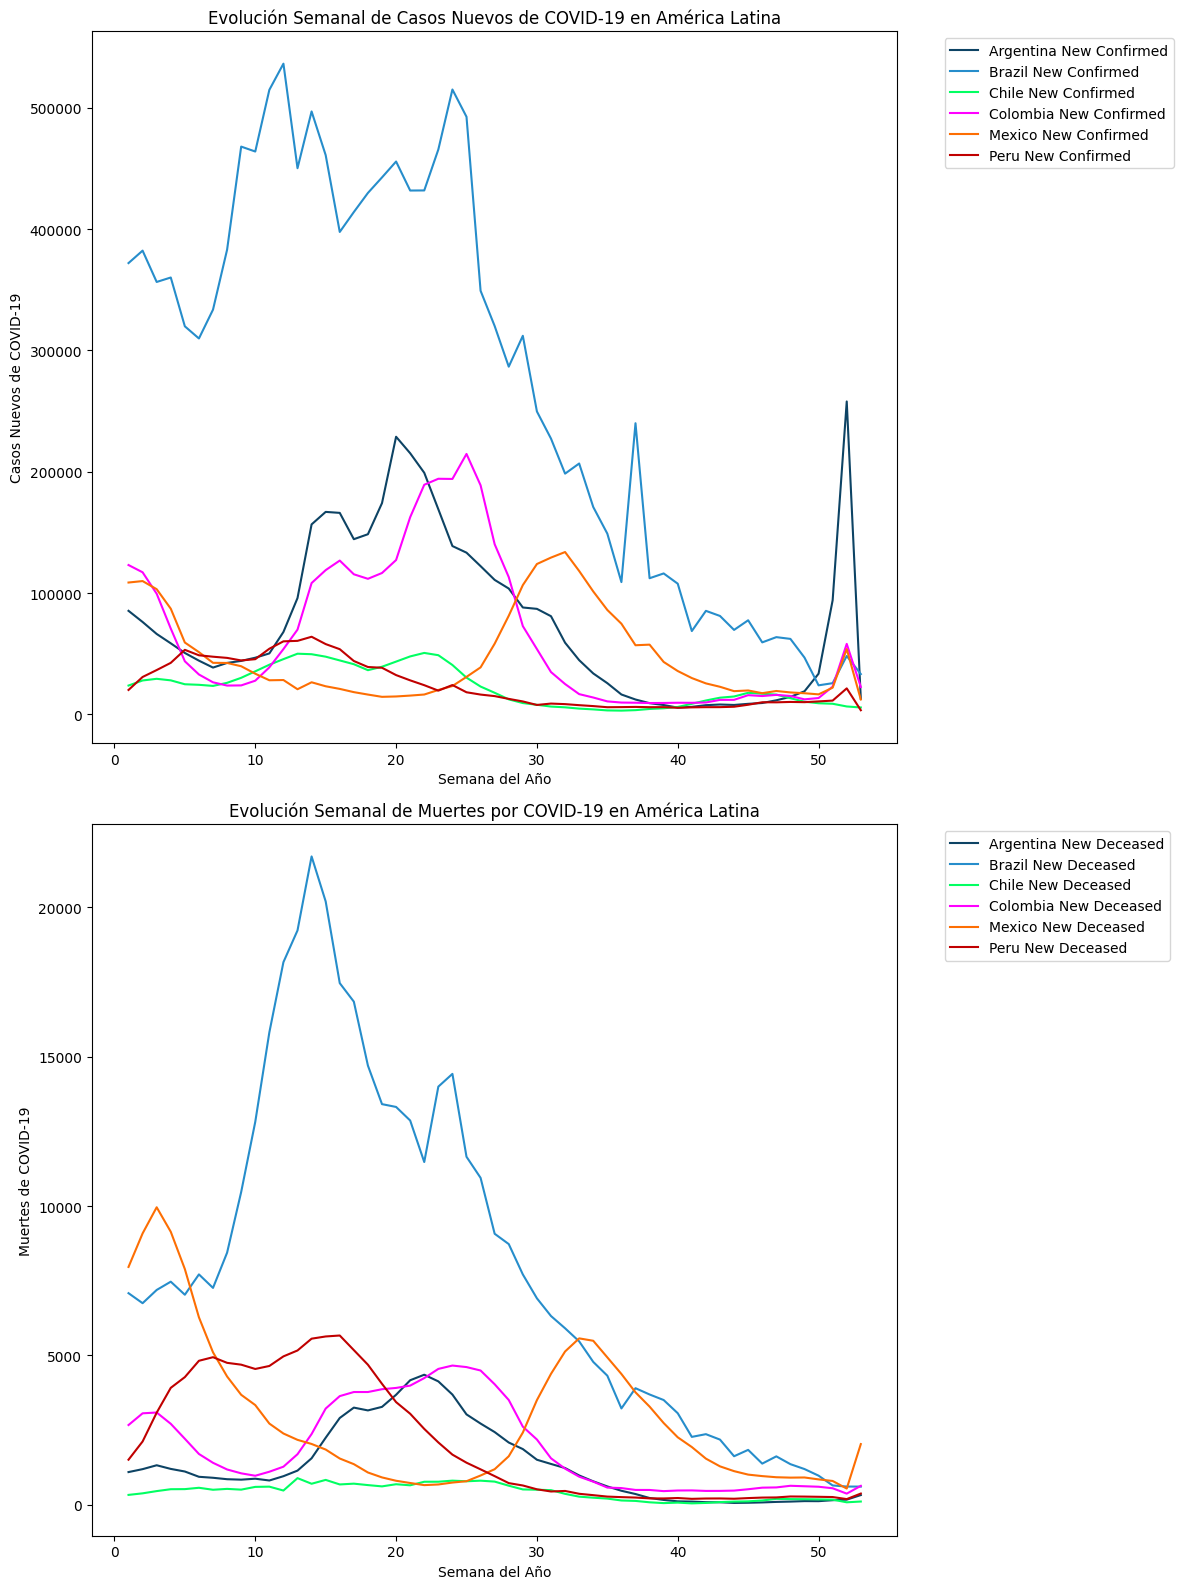

In [16]:
# Vamos a analizar como evolucionan los casos de COVID-19 en América Latina a lo largo del tiempo por semana
weekly_cases = data_2021.groupby(['country_name', 'week'])[['new_confirmed','new_deceased']].sum().reset_index() # type: ignore

fig, ax = plt.subplots(ncols=1, nrows=2, figsize=(12, 16))
for country in weekly_cases['country_name'].unique():
    country_weekly_cases = weekly_cases[weekly_cases['country_name'] == country]
    ax[0].plot(country_weekly_cases['week'], country_weekly_cases['new_confirmed'], label=f'{country} New Confirmed')
    ax[1].plot(country_weekly_cases['week'], country_weekly_cases['new_deceased'], label=f'{country} New Deceased')

ax[0].set_xlabel("Semana del Año")
ax[0].set_ylabel("Casos Nuevos de COVID-19")
ax[0].set_title("Evolución Semanal de Casos Nuevos de COVID-19 en América Latina")
ax[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

ax[1].set_xlabel("Semana del Año")
ax[1].set_ylabel("Muertes de COVID-19")
ax[1].set_title("Evolución Semanal de Muertes por COVID-19 en América Latina")
ax[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


### 4. Genera gráficas acordes a tu análisis. Las mismas pueden ser:

- Evolución de Casos Activos vs. Recuperados
- Tasa de Crecimiento (%)
- Relación entre la Cobertura de Vacunación y la Reducción de Casos
- ('País') Progreso de la vacunación por país
- Nuevos casos y temperatura promedio
- Impacto de la Urbanización en la Propagación del Covid-19
- Evolución Semanal de Casos Nuevos
- Evolución Anual de Casos Nuevos
- Distribución de la Población por Edad en Países
- Comparación de Estrategias de Vacunación en América Latina
- Evolución del Número de Muertes Diarias.
- Prevalencia de Condiciones Preexistentes en Países con Altas y Bajas Tasas de Mortalidad
- Variación Mensual de Casos y Muertes
- Análisis Temporal de la Mortalidad/
- Comparación de la Situación Actual (Contexto de los datos)




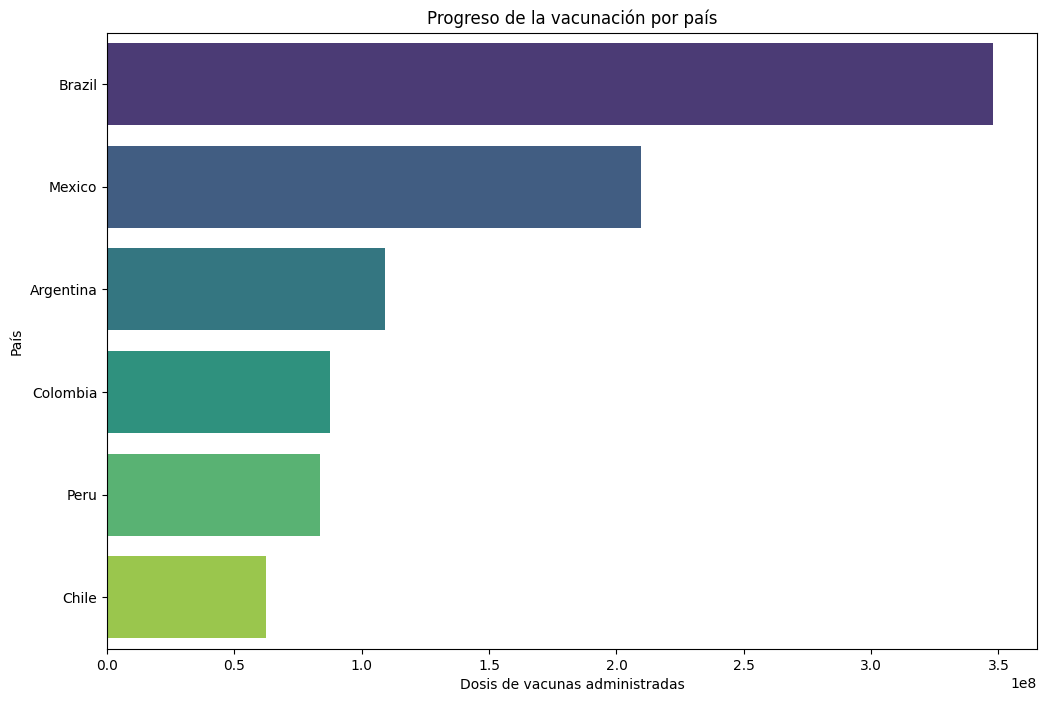

In [17]:
# - Comparación de Estrategias de Vacunación en América Latina
vaccination_data = data.groupby('country_name')['cumulative_vaccine_doses_administered'].max().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=vaccination_data.values, y=vaccination_data.index, hue=vaccination_data.index, palette='viridis')
plt.xlabel('Dosis de vacunas administradas')
plt.ylabel('País')
plt.title('Progreso de la vacunación por país')

plt.show()

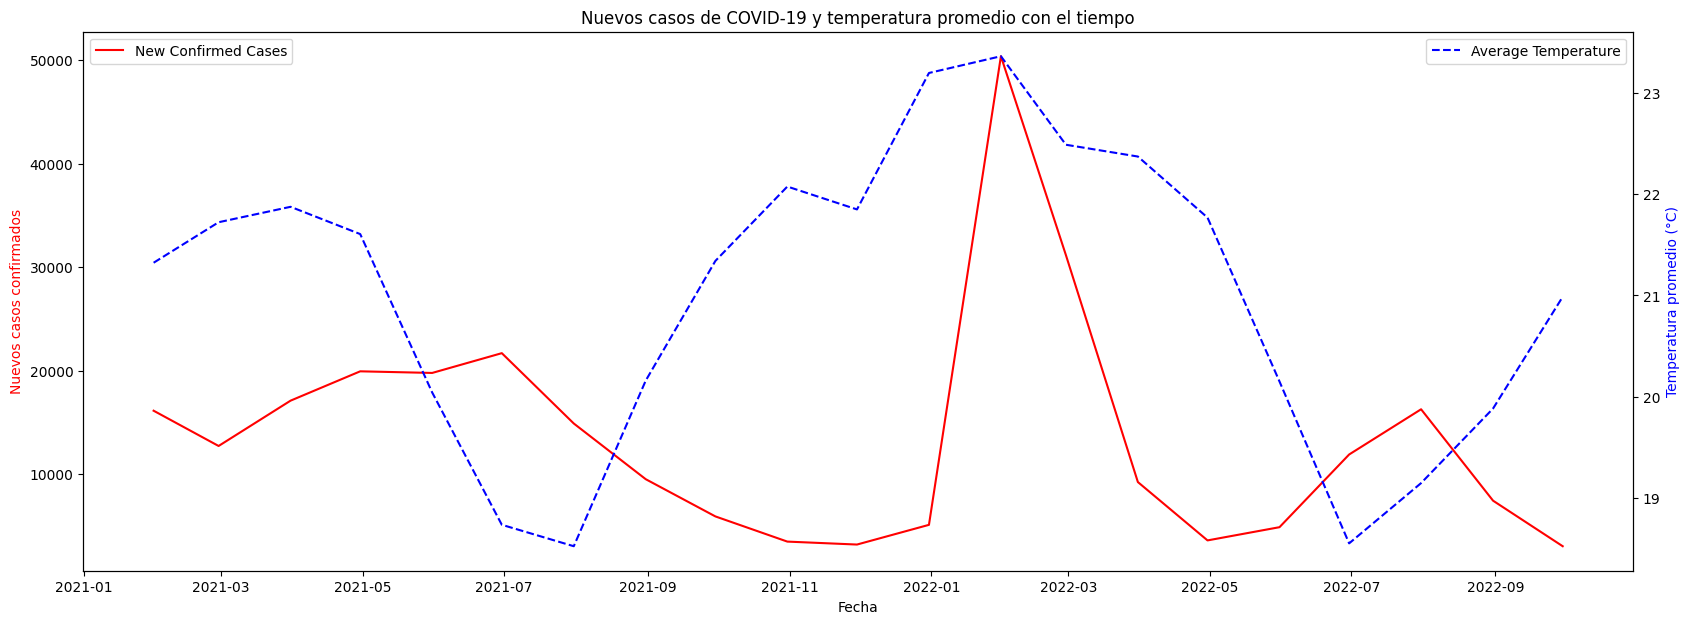

In [18]:
# - Nuevos casos y temperatura promedio
# Graficamos la relación entre la temperatura promedio y los nuevos casos confirmados de COVID-19

plt.figure(figsize=(20, 7))
ax1 = plt.gca() # Obtiene el eje actual de la gráfica y lo asigna a ax1.
ax2 = ax1.twinx() # Crea un segundo eje ax2 que comparte el mismo eje x que ax1, permitiendo graficar dos conjuntos de datos con diferentes escalas y unidades en el mismo gráfico.
ax1.plot(data.resample('ME').mean(numeric_only=True).index, data.resample('ME').mean(numeric_only=True)['new_confirmed'], color='red', label='New Confirmed Cases')
ax2.plot(data.resample('ME').mean(numeric_only=True).index, data.resample('ME').mean(numeric_only=True)['average_temperature_celsius'], color='blue', label='Average Temperature', linestyle='--')

ax1.set_xlabel('Fecha')
ax1.set_ylabel('Nuevos casos confirmados', color='red')
ax2.set_ylabel('Temperatura promedio (°C)', color='blue')
plt.title('Nuevos casos de COVID-19 y temperatura promedio con el tiempo')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()

In [19]:
data['deceased_percentage'] = data['cumulative_deceased'] / data['population']
data

location_key country_code country_name  new_confirmed  \
date                                                               
2021-01-02           AR           AR    Argentina         7767.0   
2021-01-03           AR           AR    Argentina         4934.0   
2021-01-04           AR           AR    Argentina        13953.0   
2021-01-05           AR           AR    Argentina        14085.0   
2021-01-06           AR           AR    Argentina        14496.0   
...                 ...          ...          ...            ...   
2022-09-09           PE           PE         Peru         2399.0   
2022-09-10           PE           PE         Peru         1773.0   
2022-09-11           PE           PE         Peru          813.0   
2022-09-12           PE           PE         Peru          441.0   
2022-09-13           PE           PE         Peru         1150.0   

            new_deceased  cumulative_confirmed  cumulative_deceased  \
date                                                                  
2021-01-02         166.0             1670634.0              46688.0   
2021-01-03         157.0             1675568.0              46845.0   
2021-01-04         157.0             1689521.0              47002.0   
2021-01-05         160.0             1703606.0              47162.0   
2021-01-06         131.0             1718102.0              47293.0   
...                  ...                   ...                  ...   
2022-09-09          42.0             4123435.0             216045.0   
2022-09-10          41.0             4125208.0             216086.0   
2022-09-11          39.0             4126021.0             216125.0   
2022-09-12          26.0             4126462.0             216151.0   
2022-09-13          22.0             4127612.0             216173.0   

            cumulative_vaccine_doses_administered  population  \
date                                                            
2021-01-02                                20334.0  44938712.0   
2021-01-03                                20529.0  44938712.0   
2021-01-04                                25164.0  44938712.0   
2021-01-05                                29852.0  44938712.0   
2021-01-06                                34162.0  44938712.0   
...                                           ...         ...   
2022-09-09                             83589950.0  29381884.0   
2022-09-10                             83614744.0  29381884.0   
2022-09-11                             83624932.0  29381884.0   
2022-09-12                             83624934.0  29381884.0   
2022-09-13                                    0.0  29381884.0   

            population_male  ...  area_urban_sq_km  life_expectancy  \
date                         ...                                      
2021-01-02       19523766.0  ...           55032.0           76.520   
2021-01-03       19523766.0  ...           55032.0           76.520   
2021-01-04       19523766.0  ...           55032.0           76.520   
2021-01-05       19523766.0  ...           55032.0           76.520   
2021-01-06       19523766.0  ...           55032.0           76.520   
...                     ...  ...               ...              ...   
2022-09-09       14450757.0  ...           16425.0           76.516   
2022-09-10       14450757.0  ...           16425.0           76.516   
2022-09-11       14450757.0  ...           16425.0           76.516   
2022-09-12       14450757.0  ...           16425.0           76.516   
2022-09-13       14450757.0  ...           16425.0           76.516   

            adult_male_mortality_rate  adult_female_mortality_rate  \
date                                                                 
2021-01-02                    147.086                       79.483   
2021-01-03                    147.086                       79.483   
2021-01-04                    147.086                       79.483   
2021-01-05                    147.086                       79.483   
2021-01-06  

In [20]:
high_mortality_countries = data.groupby('country_name')['deceased_percentage'].max().sort_values(ascending=False).head(5).index
high_mortality_countries

Index(['Peru', 'Chile', 'Brazil', 'Colombia', 'Argentina'], dtype='object', name='country_name')

In [21]:
age_groups = ['population_age_00_09', 'population_age_10_19', 'population_age_20_29', 'population_age_30_39', 'population_age_40_49', 'population_age_50_59', 'population_age_60_69', 'population_age_70_79', 'population_age_80_and_older']
data[age_groups]

population_age_00_09  population_age_10_19  population_age_20_29  \
date                                                                           
2021-01-02             6718871.0             7045513.0             6430658.0   
2021-01-03             6718871.0             7045513.0             6430658.0   
2021-01-04             6718871.0             7045513.0             6430658.0   
2021-01-05             6718871.0             7045513.0             6430658.0   
2021-01-06             6718871.0             7045513.0             6430658.0   
...                          ...                   ...                   ...   
2022-09-09             5140624.0             5035905.0             4895056.0   
2022-09-10             5140624.0             5035905.0             4895056.0   
2022-09-11             5140624.0             5035905.0             4895056.0   
2022-09-12             5140624.0             5035905.0             4895056.0   
2022-09-13             5140624.0             5035905.0             4895056.0   

            population_age_30_39  population_age_40_49  population_age_50_59  \
date                                                                           
2021-01-02             5777148.0             4507125.0             3911943.0   
2021-01-03             5777148.0             4507125.0             3911943.0   
2021-01-04             5777148.0             4507125.0             3911943.0   
2021-01-05             5777148.0             4507125.0             3911943.0   
2021-01-06             5777148.0             4507125.0             3911943.0   
...                          ...                   ...                   ...   
2022-09-09             4379777.0             3660378.0             2772568.0   
2022-09-10             4379777.0             3660378.0             2772568.0   
2022-09-11             4379777.0             3660378.0             2772568.0   
2022-09-12             4379777.0             3660378.0             2772568.0   
2022-09-13             4379777.0             3660378.0             2772568.0   

            population_age_60_69  population_age_70_79  \
date                                                     
2021-01-02             2914251.0             1817557.0   
2021-01-03             2914251.0             1817557.0   
2021-01-04             2914251.0             1817557.0   
2021-01-05             2914251.0             1817557.0   
2021-01-06             2914251.0             1817557.0   
...                          ...                   ...   
2022-09-09             1846407.0             1078066.0   
2022-09-10             1846407.0             1078066.0   
2022-09-11             1846407.0             1078066.0   
2022-09-12             1846407.0             1078066.0   
2022-09-13             1846407.0             1078066.0   

            population_age_80_and_older  
date                                     
2021-01-02                     994030.0  
2021-01-03                     994030.0  
2021-01-04                     994030.0  
2021-01-05                     994030.0  
2021-01-06                     994030.0  
...                                 ...  
2022-09-09                     573103.0  
2022-09-10                     573103.0  
2022-09-11                     573103.0  
2022-09-12                     573103.0  
2022-09-13                     573103.0  

[3720 rows x 9 columns]

In [22]:
age_distribution = data[data['country_name'].isin(high_mortality_countries)].groupby('country_name')[age_groups].mean()
age_distribution

population_age_00_09  population_age_10_19  \
country_name                                               
Argentina                6718871.0             7045513.0   
Brazil                  29076910.0            31160446.0   
Chile                    2428079.0             2493879.0   
Colombia                 7414155.0             8119876.0   
Peru                     5140624.0             5035905.0   

              population_age_20_29  population_age_30_39  \
country_name                                               
Argentina                6430658.0             5777148.0   
Brazil                  34104643.0            34476762.0   
Chile                    2995538.0             2945404.0   
Colombia                 8847061.0             7810299.0   
Peru                     4895056.0             4379777.0   

              population_age_40_49  population_age_50_59  \
country_name                                               
Argentina                4507125.0             3911943.0   
Brazil                  29462006.0            24421202.0   
Chile                    2578404.0             2352271.0   
Colombia                 6450787.0             5543980.0   
Peru                     3660378.0             2772568.0   

              population_age_60_69  population_age_70_79  \
country_name                                               
Argentina                2914251.0             1817557.0   
Brazil                  16896862.0             8801551.0   
Chile                    1791787.0              993126.0   
Colombia                 3771358.0             1979761.0   
Peru                     1846407.0             1078066.0   

              population_age_80_and_older  
country_name                               
Argentina                        994030.0  
Brazil                          4159027.0  
Chile                            537721.0  
Colombia                         945607.0  
Peru                             573103.0

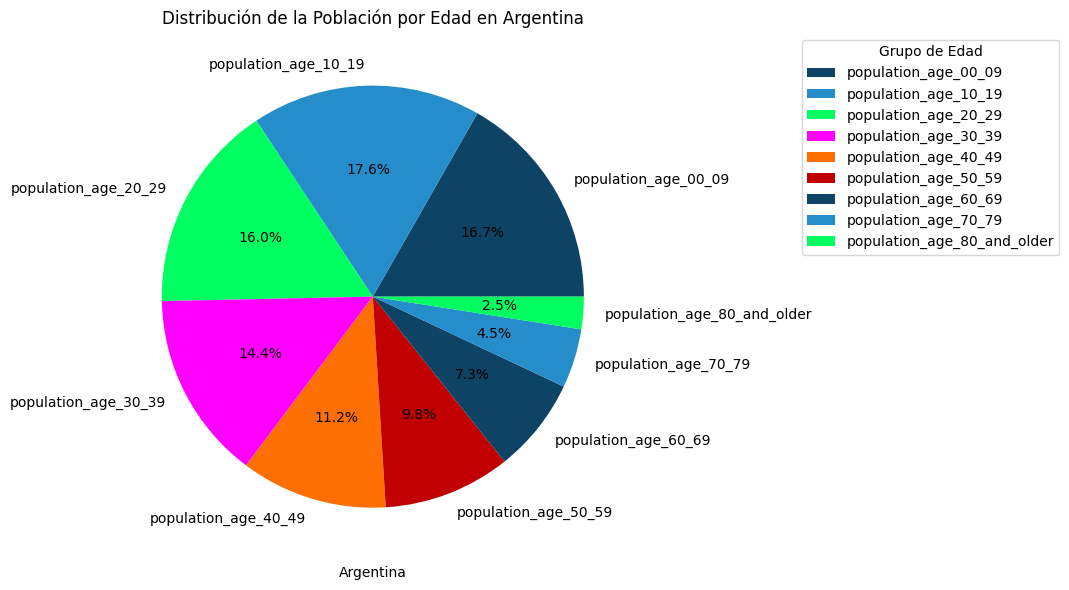

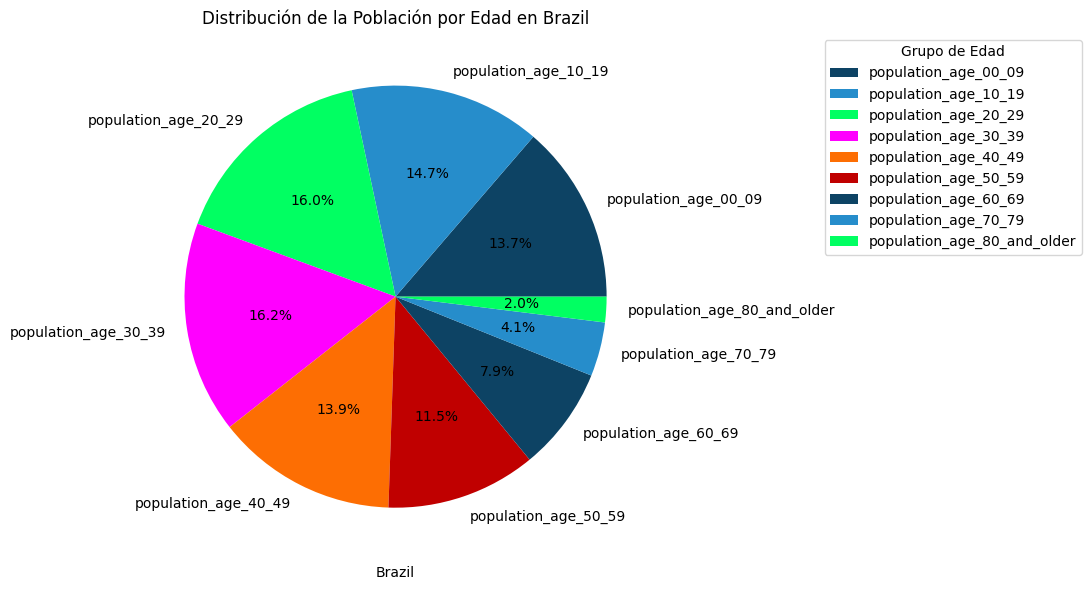

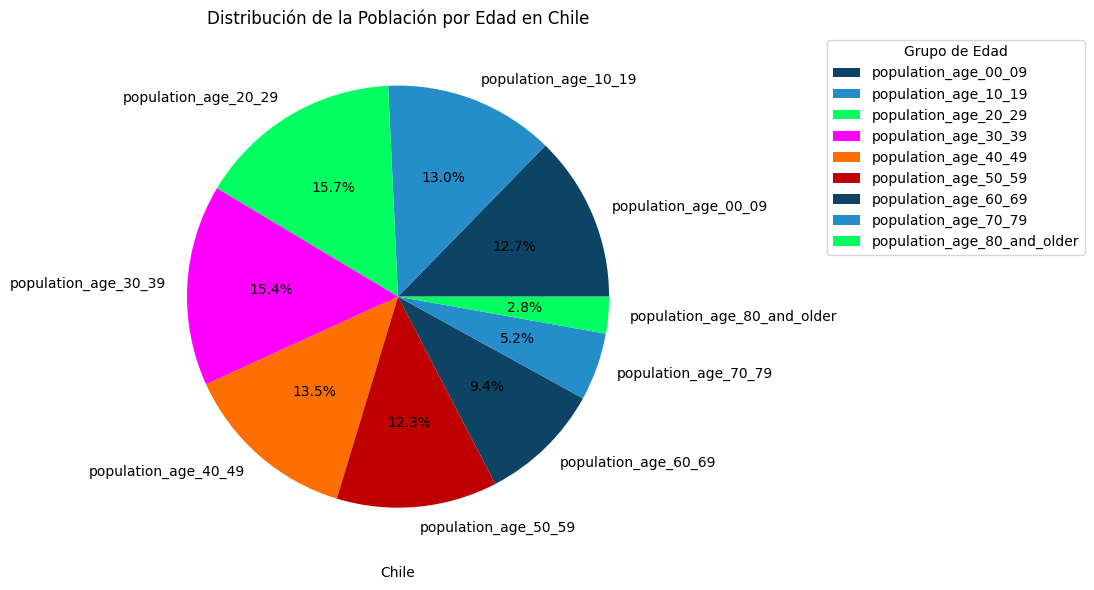

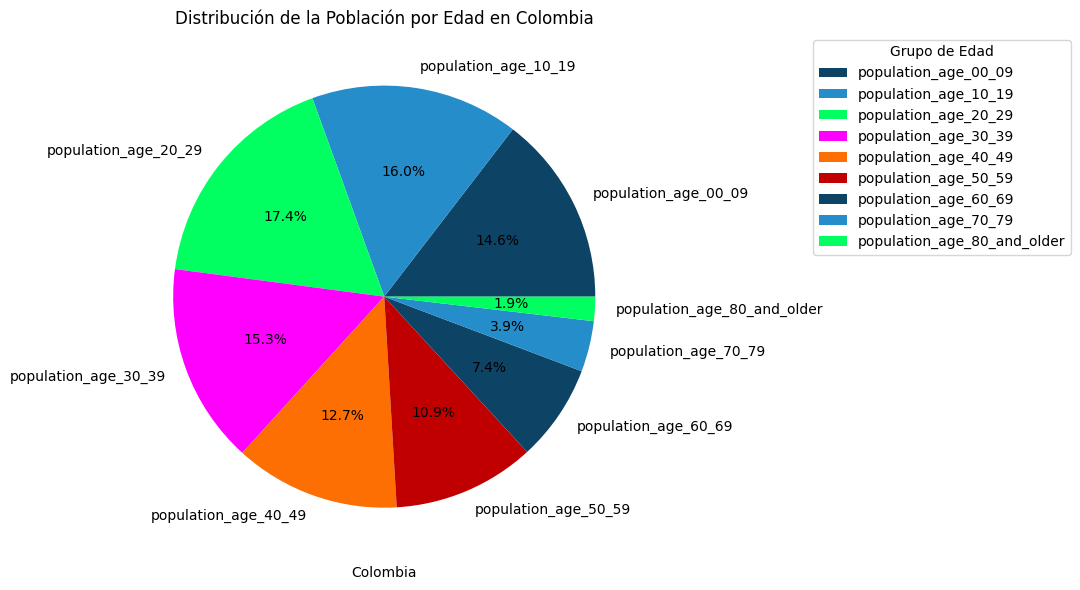

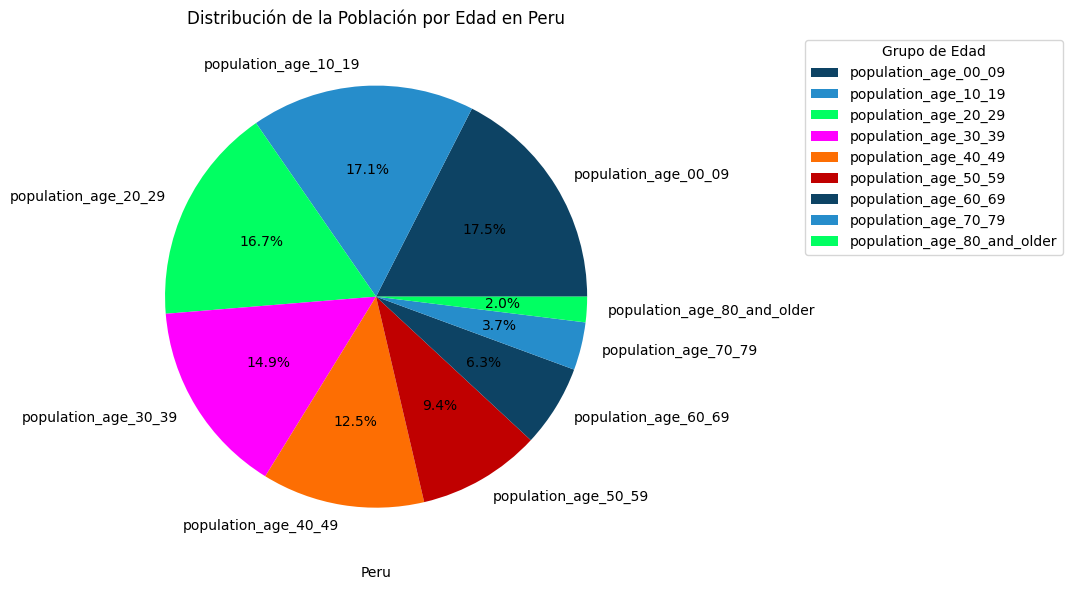

In [23]:
# Densidad de población por grupos de edad
high_mortality_countries = data.groupby('country_name')['deceased_percentage'].max().sort_values(ascending=False).head(5).index
age_groups = ['population_age_00_09', 'population_age_10_19', 'population_age_20_29', 'population_age_30_39', 'population_age_40_49', 'population_age_50_59', 'population_age_60_69', 'population_age_70_79', 'population_age_80_and_older']
age_distribution = data[data['country_name'].isin(high_mortality_countries)].groupby('country_name')[age_groups].mean()
paises = age_distribution.index.unique()

for pais in paises:
    plt.figure(figsize=(12,6))
    plt.pie(
        age_distribution.loc[pais].values,
        labels=age_distribution.loc[pais].index,
        autopct='%1.1f%%'
    )

    # age_distribution.plot(kind='pie', stacked=True, figsize=(12, 8))
    plt.xlabel(f'{pais}')
    plt.title(f'Distribución de la Población por Edad en {pais}')
    plt.legend(bbox_to_anchor=(1.3, 1), loc='upper left', title='Grupo de Edad')
    plt.tight_layout()
    plt.show()

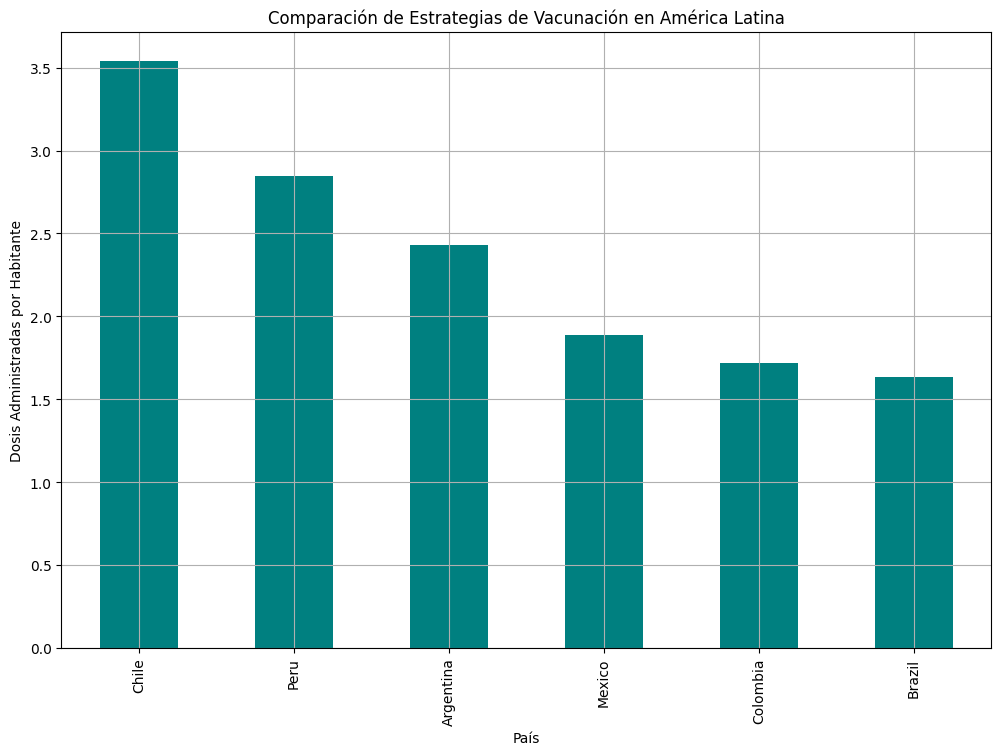

In [24]:
vaccination_strategy = data.groupby('country_name')['cumulative_vaccine_doses_administered'].max() / data.groupby('country_name')['population'].mean()
vaccination_strategy.sort_values(ascending=False).plot(kind='bar', figsize=(12, 8), color='teal', grid=True)

plt.xlabel('País')
plt.ylabel('Dosis Administradas por Habitante')
plt.title('Comparación de Estrategias de Vacunación en América Latina')
plt.show()

- Prevalencia de Condiciones Preexistentes en Países con Altas y Bajas Tasas de Mortalidad

In [25]:
top_countries = data.groupby('country_name')['deceased_percentage'].max().nlargest(3).index
top_countries

Index(['Peru', 'Chile', 'Brazil'], dtype='object', name='country_name')

In [26]:
bottom_countries = data.groupby('country_name')['deceased_percentage'].max().nsmallest(3).index # 5 paises con menor cantidad de muertes
bottom_countries

Index(['Mexico', 'Argentina', 'Colombia'], dtype='object', name='country_name')

In [27]:
all_countries = data.groupby('country_name')['deceased_percentage'].max().sort_values(ascending=False) # 5 paises con menor cantidad de muertes
all_countries

country_name
Peru         0.007357
Chile        0.003461
Brazil       0.003223
Colombia     0.003061
Argentina    0.002889
Mexico       0.002739
Name: deceased_percentage, dtype: float64

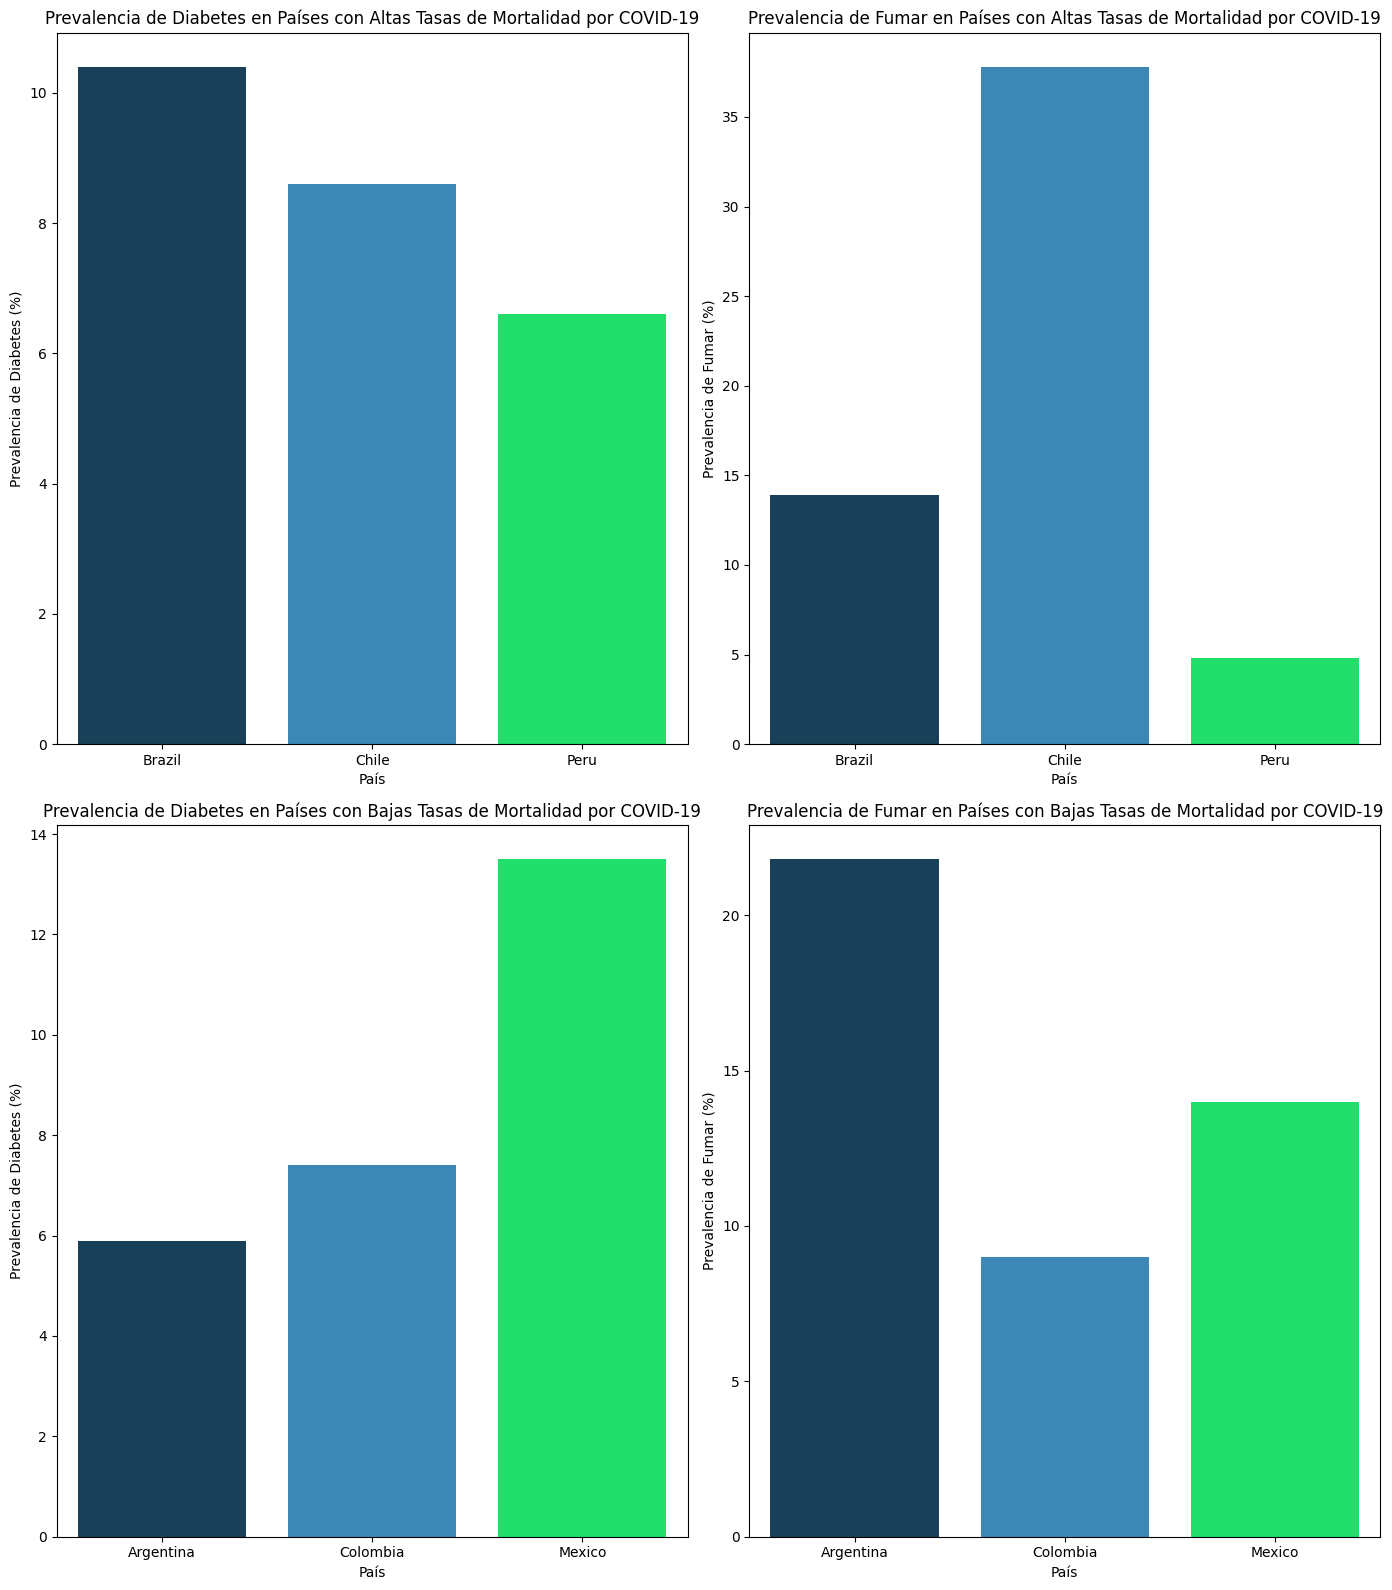

In [28]:
# Prevalencia de Condiciones Preexistentes en Países con Altas y Bajas Tasas de Mortalidad.

top_countries = data.groupby('country_name')['deceased_percentage'].max().nlargest(3).index # 5 paises con mayor cantidad de muertes
bottom_countries = data.groupby('country_name')['deceased_percentage'].max().nsmallest(3).index # 5 paises con menor cantidad de muertes

conditions_top_data = data[data['country_name'].isin(top_countries)]
conditions_bottom_data = data[data['country_name'].isin(bottom_countries)]

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(
    ncols=2,
    nrows=2,
    figsize=(14, 16)
)

# Prevalencia de diabetes en top
sns.barplot(data=conditions_top_data, x='country_name', y='diabetes_prevalence', hue='country_name', ax=ax1)
ax1.set_xlabel('País')
ax1.set_ylabel('Prevalencia de Diabetes (%)')
ax1.set_title('Prevalencia de Diabetes en Países con Altas Tasas de Mortalidad por COVID-19')

# Prevalencia de fumar en top
sns.barplot(data=conditions_top_data, x='country_name', y='smoking_prevalence', hue='country_name', ax=ax2)
ax2.set_xlabel('País')
ax2.set_ylabel('Prevalencia de Fumar (%)')
ax2.set_title('Prevalencia de Fumar en Países con Altas Tasas de Mortalidad por COVID-19')

# Prevalencia de diabetes en top
sns.barplot(data=conditions_bottom_data, x='country_name', y='diabetes_prevalence', hue='country_name', ax=ax3)
ax3.set_xlabel('País')
ax3.set_ylabel('Prevalencia de Diabetes (%)')
ax3.set_title('Prevalencia de Diabetes en Países con Bajas Tasas de Mortalidad por COVID-19')

# Prevalencia de fumar en top
sns.barplot(data=conditions_bottom_data, x='country_name', y='smoking_prevalence', hue='country_name', ax=ax4)
ax4.set_xlabel('País')
ax4.set_ylabel('Prevalencia de Fumar (%)')
ax4.set_title('Prevalencia de Fumar en Países con Bajas Tasas de Mortalidad por COVID-19')

plt.tight_layout()

plt.show()

In [29]:
data['case_fatality_rate'] = data['cumulative_deceased'] / data['cumulative_confirmed'] # Otro indice de fatalidad posible. Muertos sobre contagiados. 
fatality_rates = data.groupby('country_name')['case_fatality_rate'].last().sort_values()
fatality_rates

country_name
Mexico       0.008054
Chile        0.013313
Argentina    0.013388
Brazil       0.019830
Colombia     0.022478
Peru         0.052372
Name: case_fatality_rate, dtype: float64

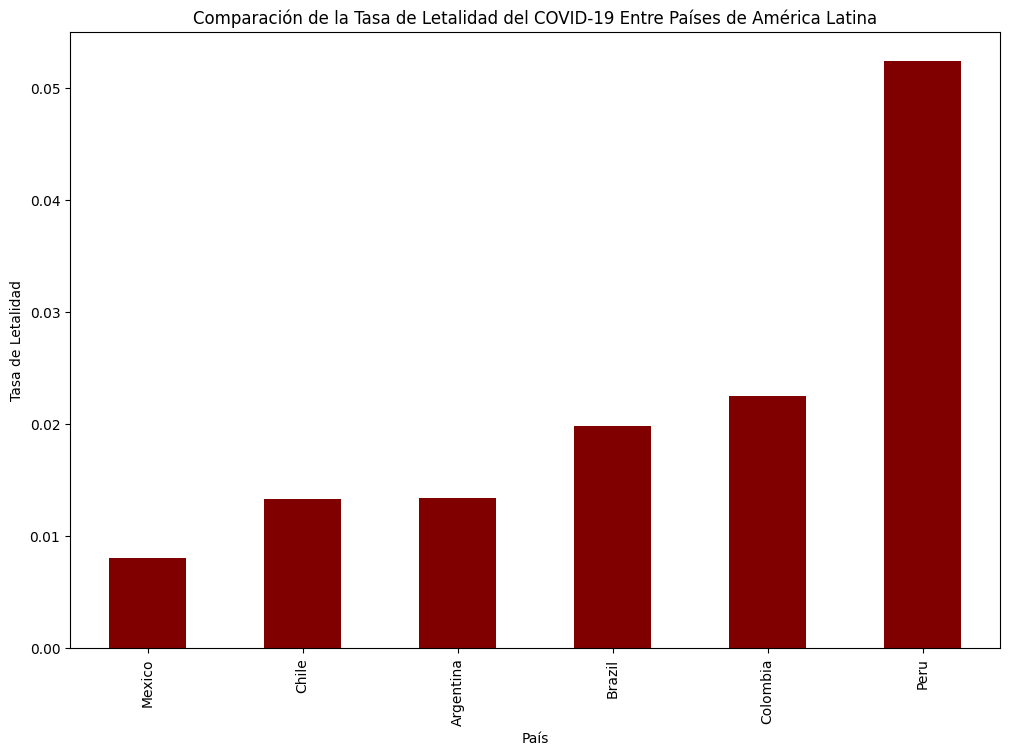

In [30]:
#  Fatalidad por pais

data['case_fatality_rate'] = data['cumulative_deceased'] / data['cumulative_confirmed']
fatality_rates = data.groupby('country_name')['case_fatality_rate'].last().sort_values()

plt.figure(figsize=(12, 8))
fatality_rates.plot(kind='bar', color='maroon')
plt.xlabel('País')
plt.ylabel('Tasa de Letalidad')
plt.title('Comparación de la Tasa de Letalidad del COVID-19 Entre Países de América Latina')
plt.show()

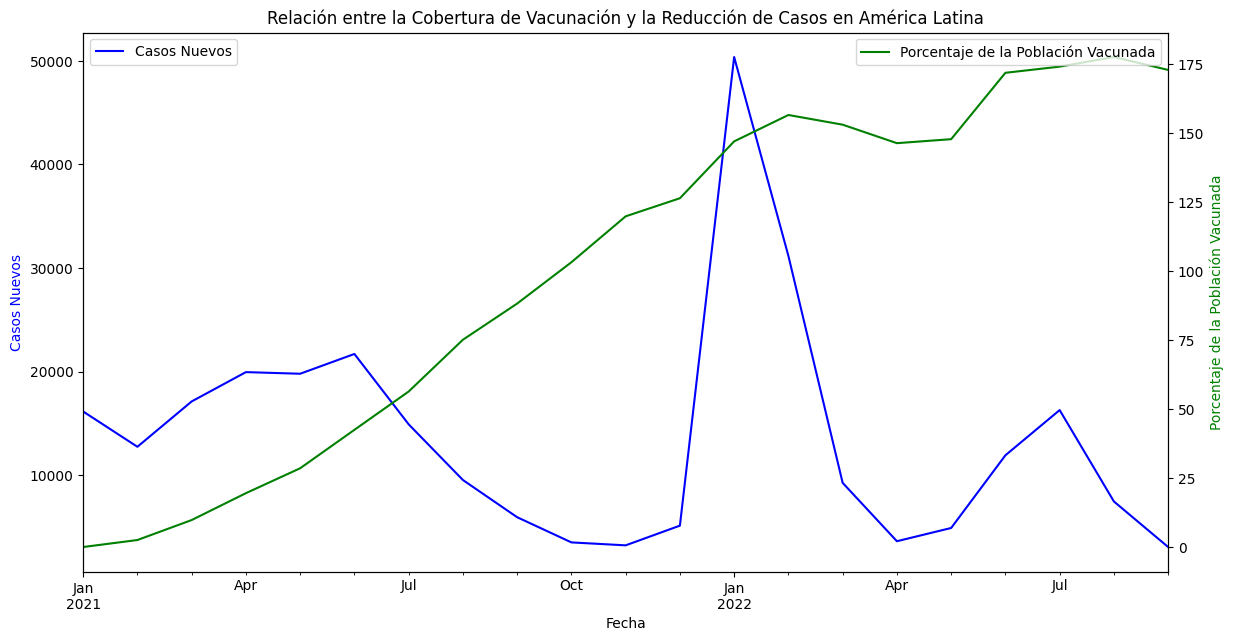

In [31]:
# Como evoluciona la vacunación en América Latina y la reducción de casos de COVID-19
plt.figure(figsize=(14, 7))
ax1 = plt.gca()
ax2 = ax1.twinx()

#crea percentajes de vacunacion
data['percentage_vaccinated'] = data['cumulative_vaccine_doses_administered'] / data['population'] * 100

# Gráfico mis dos lineplots
data.resample('ME').mean(numeric_only=True)['new_confirmed'].plot(ax=ax1, color='blue', label='Casos Nuevos')
data.resample('ME').mean(numeric_only=True)['percentage_vaccinated'].plot(ax=ax2, color='green', label='Porcentaje de la Población Vacunada')


ax1.set_xlabel('Fecha')
ax1.set_ylabel('Casos Nuevos', color='blue')
ax2.set_ylabel('Porcentaje de la Población Vacunada', color='green')
ax1.set_title('Relación entre la Cobertura de Vacunación y la Reducción de Casos en América Latina')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()

### 5. Investiga posibles correlaciones entre las distintas características.


### 6. Aplica las funciones creadas sobre cada columna de acuerdo a tus necesidades.

## Análisis y gráficos para Tablero

In [32]:
d = data[['country_name', 'population', 'population_density', 'human_development_index']]

d.head()



country_name  population  population_density  \
date                                                      
2021-01-02    Argentina  44938712.0              16.515   
2021-01-03    Argentina  44938712.0              16.515   
2021-01-04    Argentina  44938712.0              16.515   
2021-01-05    Argentina  44938712.0              16.515   
2021-01-06    Argentina  44938712.0              16.515   

            human_development_index  
date                                 
2021-01-02                    0.825  
2021-01-03                    0.825  
2021-01-04                    0.825  
2021-01-05                    0.825  
2021-01-06                    0.825

### Gráfico de Población por país

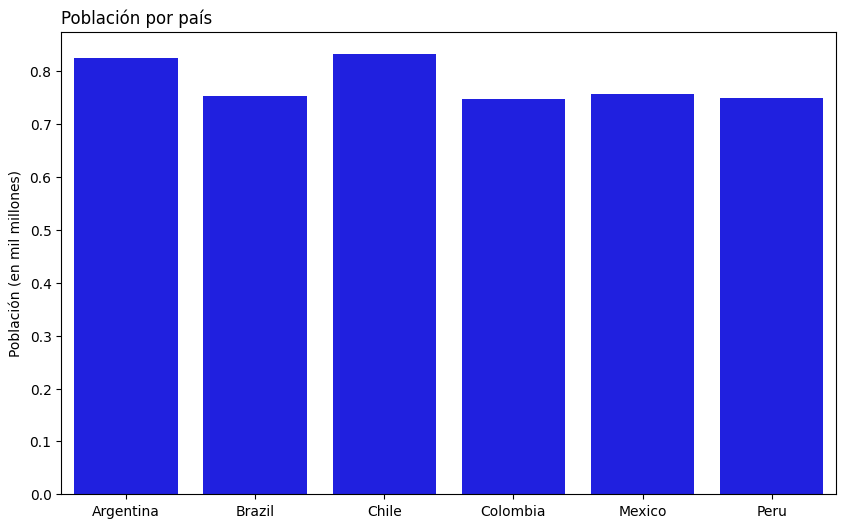

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10, 6))
#sns.barplot(data = data, x = 'country_name', y = 'population', color='blue')
sns.barplot(data = data, x = 'country_name', y = 'human_development_index', color='blue')
#plt.xticks(rotation=45)
plt.ylabel('Población (en mil millones)')
plt.xlabel('')
plt.title('Población por país', loc= 'left')
plt.show()

### Gráfico de densidad poblacional

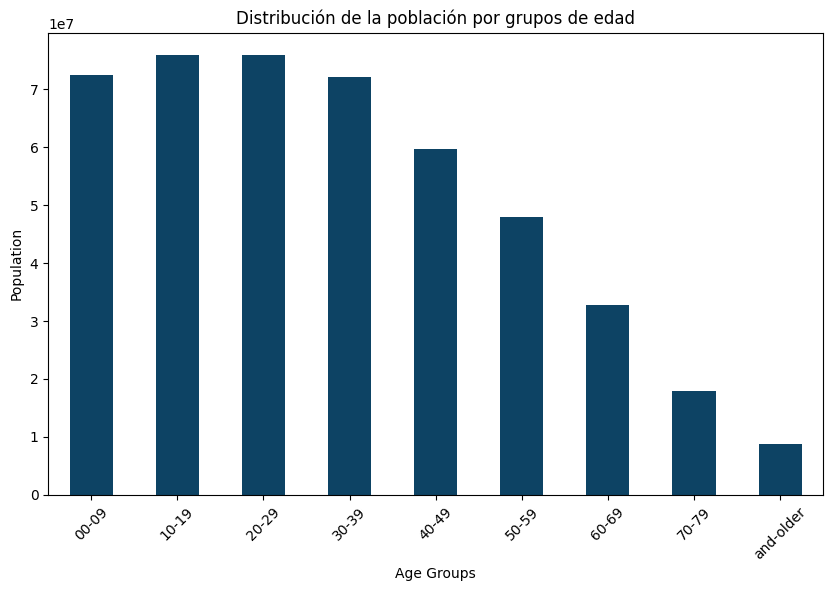

In [37]:
cut_columns = ['country_name','population_age_00_09', 'population_age_10_19', 'population_age_20_29', 'population_age_30_39', 'population_age_40_49', 'population_age_50_59', 'population_age_60_69', 'population_age_70_79', 'population_age_80_and_older']
last_cases = data[cut_columns].groupby('country_name').last().sort_values(by='population_age_00_09')
age_columns = ['population_age_00_09', 'population_age_10_19', 'population_age_20_29', 'population_age_30_39', 'population_age_40_49', 'population_age_50_59', 'population_age_60_69', 'population_age_70_79', 'population_age_80_and_older']
age_distribution = last_cases[age_columns].sum()

plt.figure(figsize=(10, 6))
age_distribution.plot(kind='bar', stacked=True)
plt.xlabel('Age Groups')
plt.ylabel('Population')
plt.title('Distribución de la población por grupos de edad')
plt.xticks(range(len(age_columns)), [col.split('_')[-2] + '-' + col.split('_')[-1] for col in age_columns], rotation=45)

plt.show()

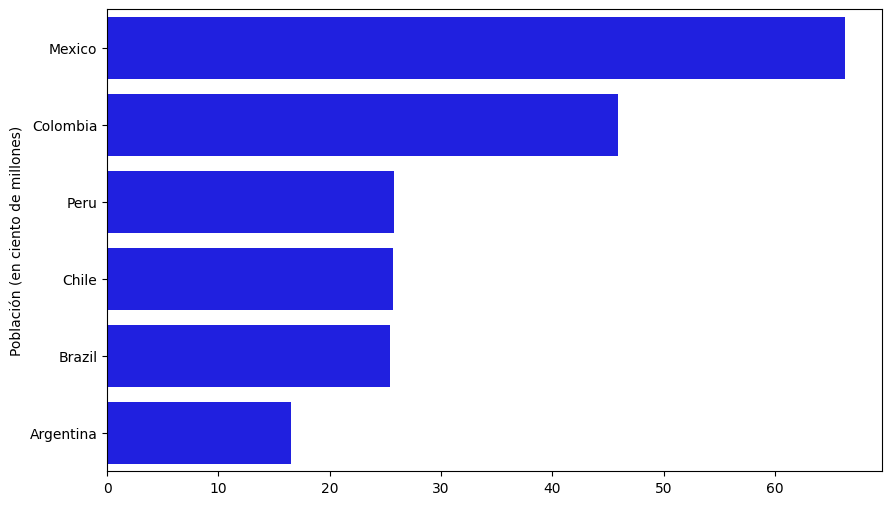

In [38]:
columnas_interes = ['country_name', 'population_density']
#, 'population_density', 'human_development_index']

last_cases = data[columnas_interes].groupby('country_name').last().sort_values(by = 'population_density', ascending=False)


plt.figure(figsize=(10, 6))
sns.barplot(data = last_cases, y = 'country_name', x = 'population_density', color='blue')
plt.ylabel('Población (en ciento de millones)')
plt.xlabel('')
plt.show()

In [39]:
last_cases.head()


population_density
country_name                    
Mexico                    66.325
Colombia                  45.861
Peru                      25.759
Chile                     25.710
Brazil                    25.431

### Greafico de Estrategía de vacunación

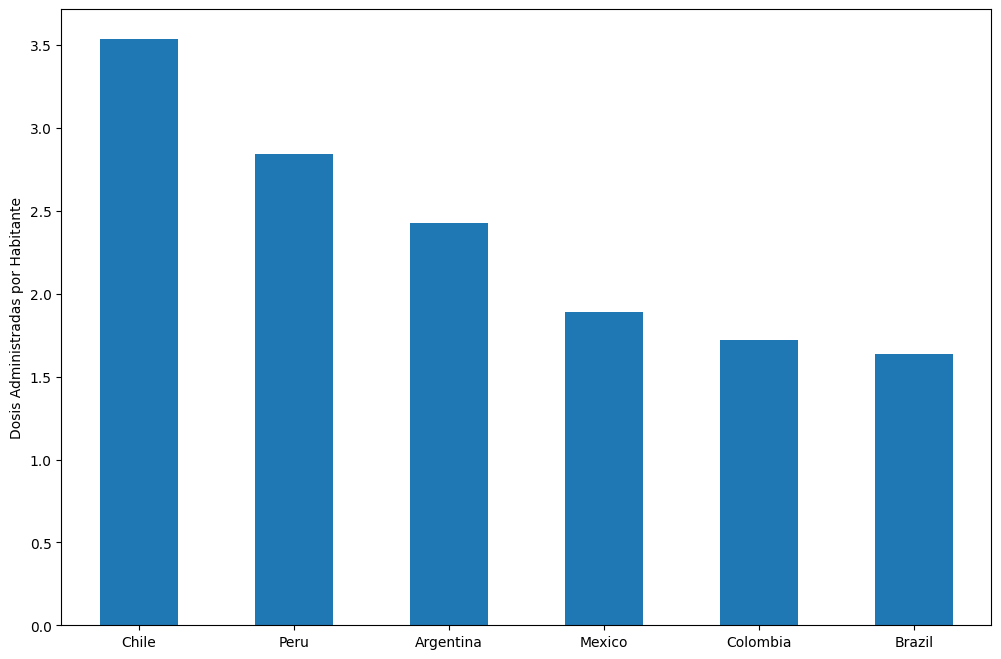

In [4]:
# The following code to create a dataframe and remove duplicated rows is always executed and acts as a preamble for your script: 

# dataset = pandas.DataFrame(country_name, cumulative_vaccine_doses_administered)
# dataset = dataset.drop_duplicates()

# Paste or type your script code here:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargamos la data

dataset = data

# Graficamos lo que acabamos de calcular
#estrategia_vacunacion = dataset.groupby('country_name')['cumulative_vaccine_doses_administered'].max() / dataset.groupby('country_name')['population'].mean()

estrategia_vacunacion = dataset.groupby('country_name')['cumulative_vaccine_doses_administered'].max() / dataset.groupby('country_name')['population'].max()


# Ordenamos nuestra data para que se distingan las estrategia por país de mayor a menor
estrategia_vacunacion.sort_values(ascending=False).plot(kind='bar', figsize=(12, 8))

plt.ylabel('Dosis Administradas por Habitante',
           fontsize=10)
plt.xlabel('')
plt.xticks(rotation=0)
plt.show()